In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn # для построения матрицы корреляций
import sklearn

In [ ]:
data0 = pd.read_excel('df_final_2.xlsx')

In [ ]:
data0

,id,PPS_ID,DOCU,TCART,H,ADAY,ATIME,PIECE_ID,HEAT_ID,BATCH,ST,INT_ST,EXT_ST,S_H,S_B,S_L,P_NH,P_NW,P_NL,P_AH,P_AB,P_AL,P_AM,FURNT,FURTIME,FURTOMZ,R_S,R_MIN,R_MAX,R_E,R_NUM,PODKAT,F_S,F_MIN,F_MAX,F_E,F_NUM,LP_T,EXTHK3,MNR3,MXR3,ENTMP3,EXTMP3,LSTPTMP3,PNUM3,EXTHK4,MNR4,MXR4,ENTMP4,EXTMP4,LSTPTMP4,PNUM4,ACCENTEMP1,ACCENTEMP2,ACCENTEMP3,ACCENTEMP4,ACCLAMISTOPTEMP1,ACCLAMISTOPTEMP2,ACCLAMISTOPTEMP3,ACCLAMISTOPTEMP4,ACCLAMICR1,ACCLAMICR2,ACCLAMICR3,ACCLAMICR4,ACCSPRAYSTOPTEMP1,ACCSPRAYSTOPTEMP2,ACCSPRAYSTOPTEMP3,ACCSPRAYSTOPTEMP4,ACCSPRAYCR1,ACCSPRAYCR2,ACCSPRAYCR3,ACCSPRAYCR4,ACCMNSRFTEMP1,ACCMNSRFTEMP2,ACCMNSRFTEMP3,ACCMNSRFTEMP4,T1080,T1090,T1100,T1110,T1120,T1130,T1140,T1150,T1160,T1170,T1180,T1190,T1200,T1210,T1220,T1240,SP,LEN,TEST,HEAD_ORDER,H_YEAR,H_FL_RM,H_FL_R02,H_FL_R05,H_FL_YSL,H_FL_A5TOT,H_FL_A5UNF,H_FL_RAT,LN_H_FL_RM,LN_H_FL_R02,LN_H_FL_R05,LN_H_FL_YSL,LN_H_FL_A5TOT,LN_H_FL_A5UNF,LN_H_FL_RAT,H_CL_RM,H_CL_R02,H_CL_R05,H_CL_YSL,H_CL_A5TOT,H_CL_A5UNF,H_CL_RAT,LN_H_CL_RM,LN_H_CL_R02,LN_H_CL_R05,LN_H_CL_YSL,LN_H_CL_A5TOT,LN_H_CL_A5UNF,LN_H_CL_RAT,H_HV,H20V1_10,H20V1_5,H20V2_10,H20V2_5,H20V3_10,H20V3_5,H0V1,H0V2,H0V3,HM5V1_10,HM5V2_10,HM5V3_10,HM5V1_7,HM5V2_7,HM5V3_7,HM20V1,HM20V2,HM20V3,HM40V1,HM40V2,HM40V3,HM42V1,HM42V2,HM42V3,HM60V1,HM60V2,HM60V3,HM80V1,HM80V2,HM80V3,HM20VE1,HM20VE2,HM20VE3,HM42VE1,HM42VE2,HM42VE3,H20VA_10,H20VA_5,H0VA,HM5VA_10,HM5VA_7,HM20VA,HM40VA,HM42VA,HM60VA,HM80VA,HM20VEA,HM42VEA,HM60U1,HM60U2,HM60U3,HM60UA,HM5D1,HM5D2,HM5W1,HM5W2,HM20D1,HM20D2,HM20W1,HM20W2,HM40D1,HM40D2,HM40W1,HM40W2,HM42D1,HM42D2,HM42W1,HM42W2,HM60D1,HM60D2,HM60W1,HM60W2,HM5DA,HM20DA,HM40DA,HM42DA,HM60DA,HGRNA,HGRNMX,BODY_ORDER,B_YEAR,B_FL_RM,B_FL_R02,B_FL_R05,B_FL_YSL,B_FL_A5_TOT,B_FL_A5_UNF,B_FL_RAT,LN_B_FL_RM,LN_B_FL_R02,LN_B_FL_R05,LN_B_FL_YSL,LN_B_FL_A5_TOT,LN_B_FL_A5_UNF,LN_B_FL_RAT,B_CL_RM,B_CL_R02,B_CL_R05,B_CL_YSL,B_CL_A5_TOT,B_CL_A5_UNF,B_CL_RAT,LN_B_CL_RM,LN_B_CL_R02,LN_B_CL_R05,LN_B_CL_YSL,LN_B_CL_A5_TOT,LN_B_CL_A5_UNF,LN_B_CL_RAT,B_HV,B20V1,B20V2,B20V3,B0V1,B0V2,B0V3,BM5V1_10,BM5V2_10,BM5V3_10,BM5V1_7,BM5V2_7,BM5V3_7,BM20V1,BM20V2,BM20V3,BM40V1,BM40V2,BM40V3,BM42V1,BM42V2,BM42V3,BM60V1,BM60V2,BM60V3,BM80V1,BM80V2,BM80V3,BM20VE1,BM20VE2,BM20VE3,BM42VE1,BM42VE2,BM42VE3,B20VA,B0VA,BM20VA,BM40VA,BM42VA,BM60VA,BM80VA,BM20VEA,BM42VEA,BM60U1,BM60U2,BM60U3,BM60UA,BM5D1,BM5D2,BM5W1,BM5W2,BM20D1,BM20D2,BM20W1,BM20W2,BM40D1,BM40D2,BM40W1,BM40W2,BM42D1,BM42D2,BM42W1,BM42W2,BM60D1,BM60D2,BM60W1,BM60W2,BM5DA,BM20DA,BM40DA,BM42DA,BM60DA,BGRNA,BGRNMX,T_ORDER,T_YEAR,T_FL_RM,T_FL_R02,T_FL_R05,T_FL_YSL,T_A5_FL_TOT,T_A5_FL_UNF,T_FL_RAT,LN_T_FL_RM,LN_T_FL_R02,LN_T_FL_R05,LN_T_FL_YSL,LN_T_FL_A5_TOT,LN_T_FL_A5_UNF,LN_T_FL_RAT,T_CL_RM,T_CL_R02,T_CL_R05,T_CL_YSL,T_A5_CL_TOT,T_A5_CL_UNF,T_CL_RAT,LN_T_CL_RM,LN_T_CL_R02,LN_T_CL_R05,LN_T_CL_YSL,LN_T_CL_A5_TOT,LN_T_CL_A5_UNF,LN_T_CL_RAT,T_HV,T20V1,T20V2,T20V3,T0V1,T0V2,T0V3,TM5V1_10,TM5V2_10,TM5V3_10,TM5V1_7,TM5V2_7,TM5V3_7,TM10V1,TM10V2,TM10V3,TM20V1,TM20V2,TM20V3,TM40V1,TM40V2,TM40V3,TM42V1,TM42V2,TM42V3,TM60V1,TM60V2,TM60V3,TM80V1,TM80V2,TM80V3,TM20VE1,TM20VE2,TM20VE3,TM42VE1,TM42VE2,TM42VE3,T20VA,T0VA,TM5VA_10,TM5VA_7,TM20VA,TM40VA,TM42VA,TM60VA,TM80VA,TM20VEA,TM42VEA,TM60U1,TM60U2,TM60U3,TM60UA,TM5D1,TM5D2,TM5W1,TM5W2,TM20D1,TM20D2,TM20W1,TM20W2,TM40D1,TM40D2,TM40W1,TM40W2,TM42D1,TM42D2,TM42W1,TM42W2,TM60D1,TM60D2,TM60W1,TM60W2,TM5DA,TM20DA,TM40DA,TM42DA,TM60DA,TGRNA,TGRNMX,P_C,P_SI,P_MN,P_P,P_S,P_CR,P_MO,P_NI,P_ALU,P_B,P_CU,P_N2,P_NB,P_TI,P_V,P_CEQ,P_ARS,P_CA,P_SB,P_SN,P_PB,P_BI,P_PCM,P_H2,P_O2,P_FER,P_ALN,H_C,H_SI,H_MN,H_P,H_S,H_CR,H_MO,H_NI,H_AL,H_B,H_CU,H_N2,H_NB,H_TI,H_V,H_CEQ,H_ARS,H_CA,H_SB,H_SN,H_PB,H_BI,H_PCM,H_H2,H_O2,H_FER,H_ALN,HEAD_TENS_ORDER_DATE,HEAD_TENS_CREATION_DATE,HEAD_IB_ORDER_DATE,HEAD_IB_CREATION_DATE,HEAD_DWTT_ORDER_DATE,HEAD_DWTT_CREATION_DATE
0,121034,17003331-100000,ГОСТ 19281-2014,NaN,25.0,2017-02-09 19:49:41,19:49:41,2.017021e+15,1751597.0,1700349,09Г2С;S355J2+M;С355,09Г2С-7,09Г2С,250.0,1500.0,3740.0,25.0,2800,6000,24.86,2928.6,19226.3,10.991,1171.0,344.0,36.0,993.

### Предобработка входных переменных Х

In [ ]:
data1=pd.DataFrame()
data1[["H","R_S","R_MIN","R_MAX","R_NUM","PODKAT","F_NUM","S_H","FURNT","FURTIME","FURTOMZ","R_E","F_S","F_MIN","F_MAX","F_E","LP_T","ACCENTEMP2","ACCENTEMP3","ACCLAMICR2", 
       "B_FL_RM", "B_FL_YSL","B_FL_A5_TOT", "BM20VA", "BM40VA","BM60UA"]] = data0[["H","R_S","R_MIN","R_MAX","R_NUM","PODKAT","F_NUM","S_H","FURNT","FURTIME","FURTOMZ","R_E","F_S","F_MIN","F_MAX","F_E","LP_T","ACCENTEMP2","ACCENTEMP3","ACCLAMICR2", "B_FL_RM", "B_FL_YSL","B_FL_A5_TOT", "BM20VA", "BM40VA","BM60UA"]]

In [ ]:

data1.describe()
pd.set_option('display.max_columns', None)

In [ ]:
data1.describe()


,H,R_S,R_MIN,R_MAX,R_NUM,PODKAT,F_NUM,S_H,FURNT,FURTIME,FURTOMZ,R_E,F_S,F_MIN,F_MAX,F_E,LP_T,ACCENTEMP2,ACCENTEMP3,ACCLAMICR2,B_FL_RM,B_FL_YSL,B_FL_A5_TOT,BM20VA,BM40VA,BM60UA
count,10408.000000,10406.000000,10406.000000,10406.000000,10406.000000,10406.000000,10406.000000,10402.000000,10402.000000,10402.000000,10402.000000,10325.000000,10367.000000,10367.000000,10367.000000,10364.000000,10364.000000,8319.000000,8.000000,8320.000000,2279.000000,2270.000000,2279.000000,547.000000,1235.000000,158.000000
mean,17.376595,1000.647271,7.415842,16.287880,13.574668,68.442263,9.505958,275.209575,1178.172121,389.741396,73.136897,920.267361,829.927713,11.615918,15.751589,767.123939,751.512196,742.603101,767.162500,11.133546,531.735410,410.742731,28.264590,247.146252,195.090283,226.753165
std,6.858057,8.285297,1.679267,2.878737,1.896999,19.987387,1.872308,37.788779,5.527897,106.876165,35.961758,184.215188,46.235861,1.867472,2.802206,31.424555,23.414725,34.762319,19.346313,1.312461,17.740093,21.369112,2.143958,64.660515,70.858387,66.178651
min,8.000000,931.300000,3.060000,3.270000,2.000000,26.993500,0.000000,140.000000,1090.600000,202.000000,21.000000,0.000000,737.100000,3.040000,6.070000,0.000000,633.600000,651.300000,745.800000,3.300000,475.000000,315.000000,17.500000,44.000000,29.000000,94.000000
25%,16.000000,996.100000,6.470000,13.980000,12.000000,59.997100,9.000000,250.000000,1177.100000,312.000000,55.000000,940.300000,799.100000,10.620000,13.320000,754.700000,740.100000,732.900000,749.600000,10.400000,520.000000,395.000000,27.000000,200.500000,143.750000,176.250000
50%,16.000000,1001.200000,7.030000,16.030000,14.000000,64.000600,9.000000,250.000000,1178.900000,365.000000,67.000000,955.000000,822.500000,11.510000,15.810000,758.100000,744.900000,737.100000,766.400000,11.000000,530.000000,415.000000,28.000000,246.000000,185.000000,212.500000
75%,20.000000,1005.500000,7.980000,18.120000,14.000000,80.998875,11.000000,310.000000,1180.700000,443.000000,85.000000,970.400000,839.400000,12.700000,17.380000,765.700000,751.600000,742.200000,781.475000,11.800000,540.000000,425.000000,30.000000,289.500000,237.250000,271.750000
max,260.000000,1075.000000,17.040000,31.110000,20.000000,256.795500,17.000000,355.000000,1250.600000,1220.000000,969.000000,1065.800000,1016.200000,22.940000,30.100000,939.100000,1044.600000,1600.000000,793.800000,21.900000,620.000000,500.000000,52.000000,437.000000,513.000000,428.000000


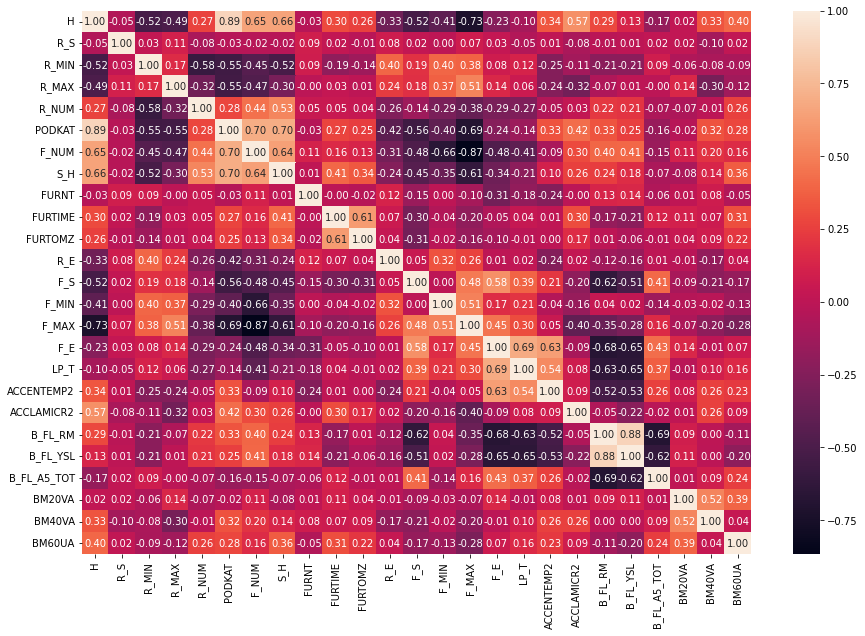

In [ ]:
# строим матрицу корреляций - там где значения близкие к 1, то данные связаны между собой - 
# используем это в дальнейшем анализе (их нельзя разделять, то есть нельзя удалить из дата фрейма один из этих связанных столбцов)
data_cor = pd.DataFrame()
data_cor[["H","R_S","R_MIN","R_MAX","R_NUM","PODKAT","F_NUM","S_H","FURNT","FURTIME","FURTOMZ","R_E","F_S","F_MIN","F_MAX","F_E","LP_T","ACCENTEMP2","ACCLAMICR2", 
       "B_FL_RM", "B_FL_YSL","B_FL_A5_TOT", "BM20VA", "BM40VA","BM60UA"]]=data1[["H","R_S","R_MIN","R_MAX","R_NUM","PODKAT","F_NUM","S_H","FURNT","FURTIME","FURTOMZ","R_E","F_S","F_MIN","F_MAX","F_E","LP_T","ACCENTEMP2","ACCLAMICR2", 
       "B_FL_RM", "B_FL_YSL","B_FL_A5_TOT", "BM20VA", "BM40VA","BM60UA"]] 
plt.figure(figsize = (15,10))
seaborn.heatmap(data_cor.corr(method = 'spearman'),annot=True,fmt='.2f')

In [ ]:
# на матрице корреляций видим, что показания "Н" и "PODKAT" коррелируют между собой (0.77). Удаляем PODKAT из входных переменных. 
# F_NUM и F_MAX -0.85 -- удаляем F_NUM

In [ ]:
# на матрице корреляций видим, что показания "Н" и "PODKAT" коррелируют между собой (0.77). Удаляем PODKAT, F_MAX из входных переменных. 
data1=pd.DataFrame()
data1[["H","R_S","R_MIN","R_MAX","R_NUM","F_NUM","S_H","FURNT","FURTIME","FURTOMZ","R_E","F_S","F_MIN","F_E","LP_T","ACCENTEMP2","ACCENTEMP3","ACCLAMICR2", 
       "B_FL_RM", "B_FL_YSL","B_FL_A5_TOT", "BM20VA", "BM40VA","BM60UA"]] = data0[["H","R_S","R_MIN","R_MAX","R_NUM","F_NUM","S_H","FURNT","FURTIME","FURTOMZ","R_E","F_S","F_MIN","F_E","LP_T","ACCENTEMP2","ACCENTEMP3","ACCLAMICR2", 
       "B_FL_RM", "B_FL_YSL","B_FL_A5_TOT", "BM20VA", "BM40VA","BM60UA"]]

Удаляем показания (строки) ACCENTEMP2 и ACCLAMICR2, если присутствуют показания ACCENTEMP3	ACCLAMICR3	

In [ ]:
data1 = data1.drop(np.where(np.isnan(data1['ACCENTEMP3']) != True)[0])
# print(data1['ACCENTEMP3'])
del data1['ACCENTEMP3']

In [ ]:
data1=pd.DataFrame()
data1[["H","R_S","R_MIN","R_MAX","R_NUM","F_NUM","S_H","FURNT","FURTIME","FURTOMZ","R_E","F_S","F_MIN","F_E","LP_T",
       "B_FL_RM", "B_FL_YSL","B_FL_A5_TOT", "BM20VA", "BM40VA","BM60UA"]] = data0[["H","R_S","R_MIN","R_MAX","R_NUM","F_NUM","S_H","FURNT","FURTIME","FURTOMZ","R_E","F_S","F_MIN","F_E","LP_T",
       "B_FL_RM", "B_FL_YSL","B_FL_A5_TOT", "BM20VA", "BM40VA","BM60UA"]]


### работа с выбросами

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(0.0, 100.0)

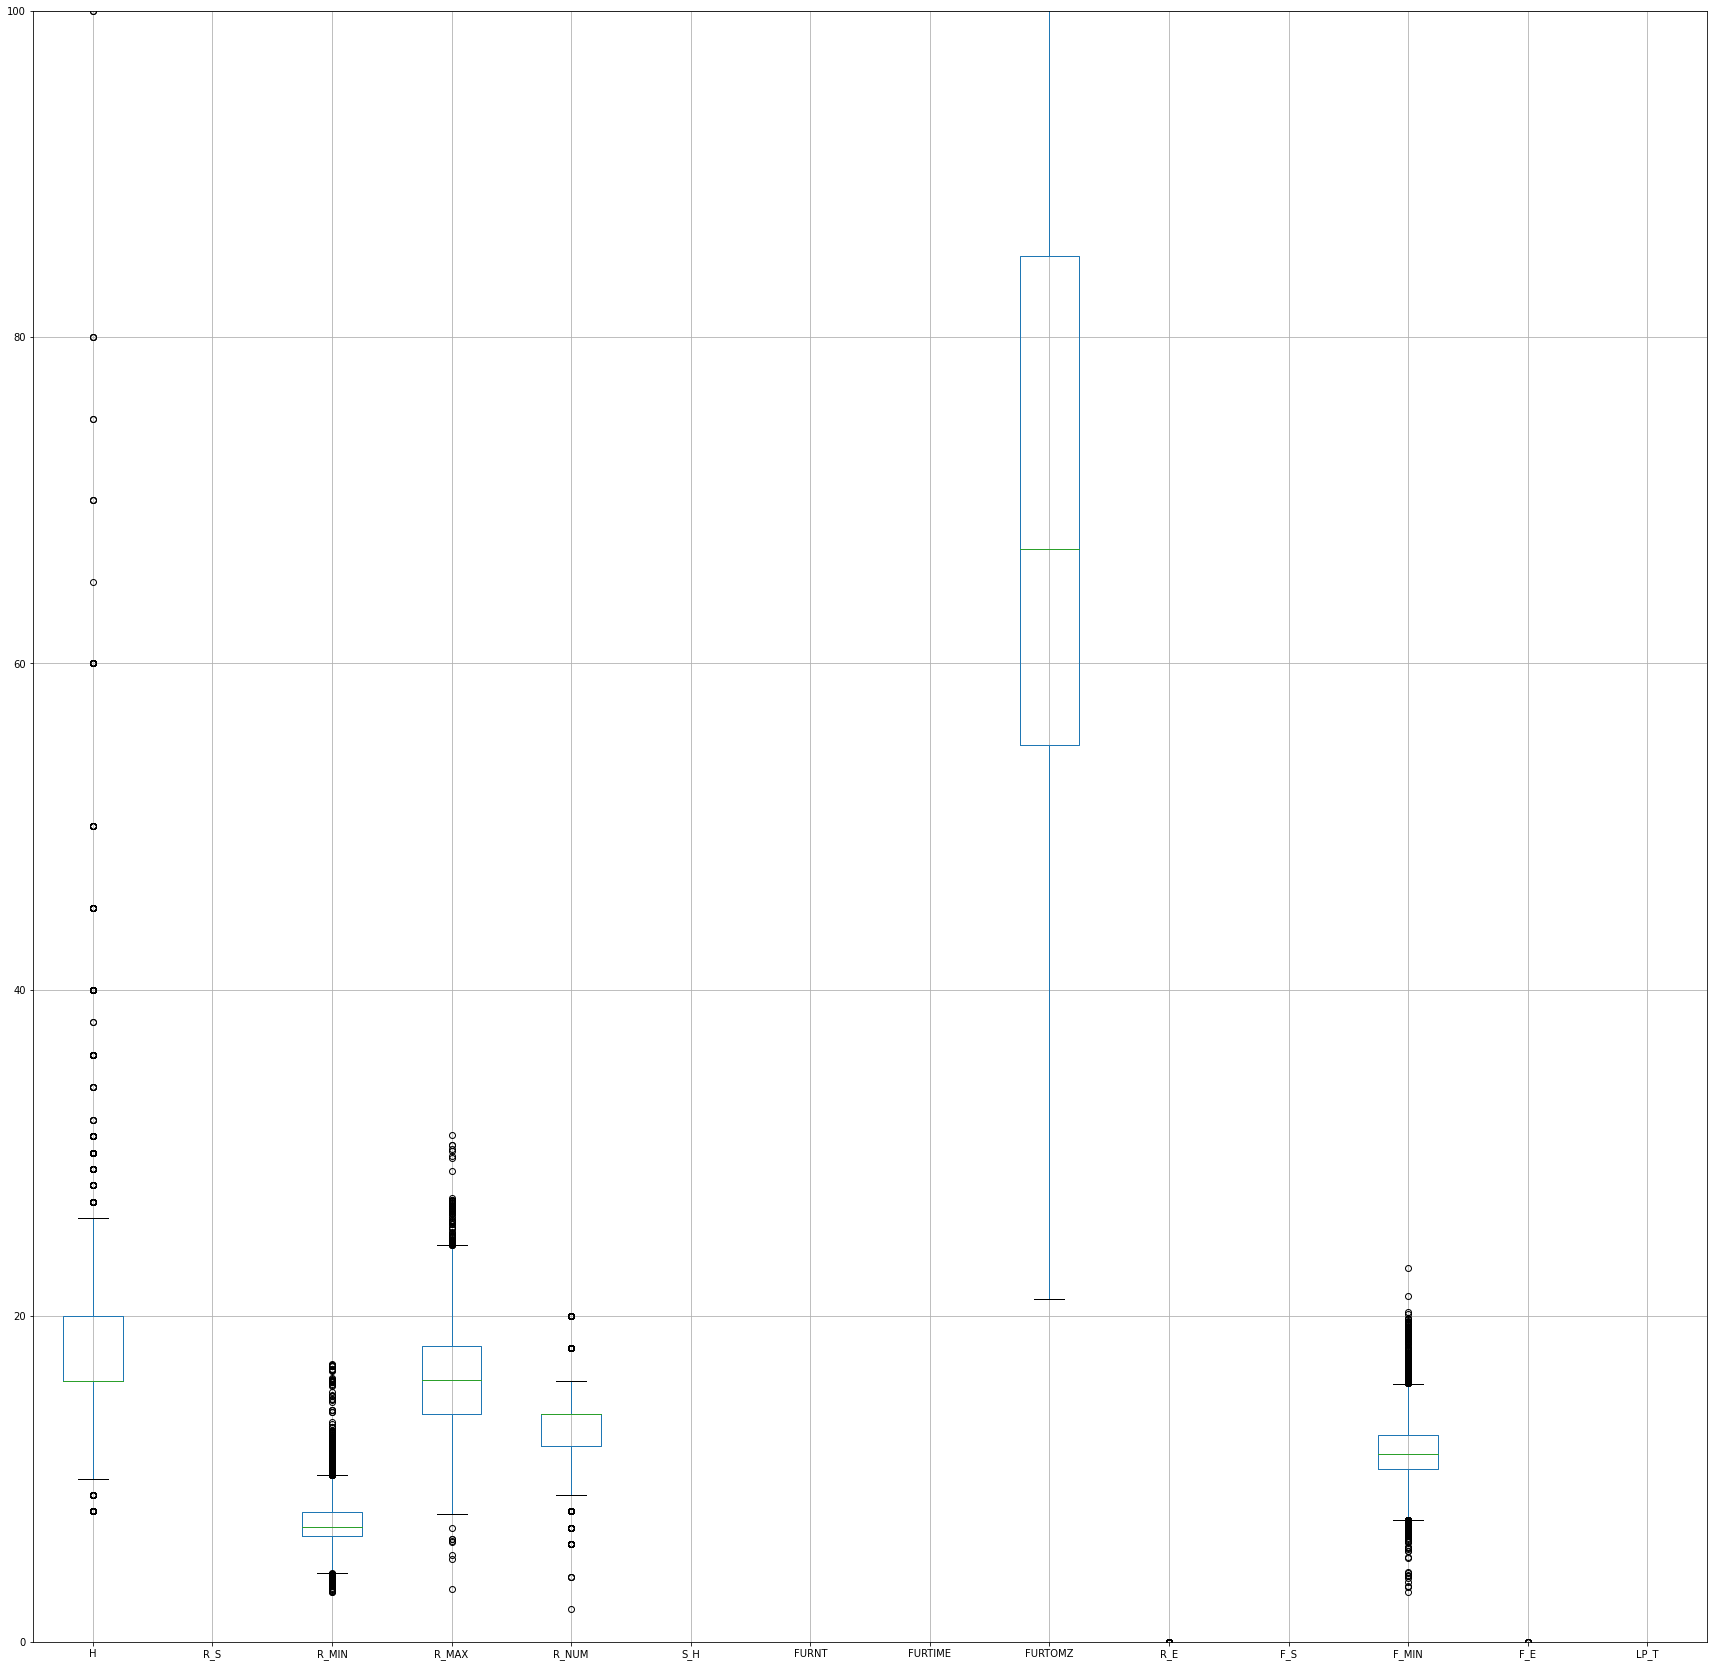

In [ ]:
# проверяем выбросы, после исключим эти строки (регрессия очень чувствительна к выбросам)
numeric_col = ["H","R_S","R_MIN","R_MAX","R_NUM","S_H","FURNT","FURTIME","FURTOMZ","R_E","F_S","F_MIN","F_E","LP_T"]
ax = plt.figure(figsize=(30,30))
ax = data1.boxplot(numeric_col)
ax.set_ylim(0,100)

(0.0, 1000.0)

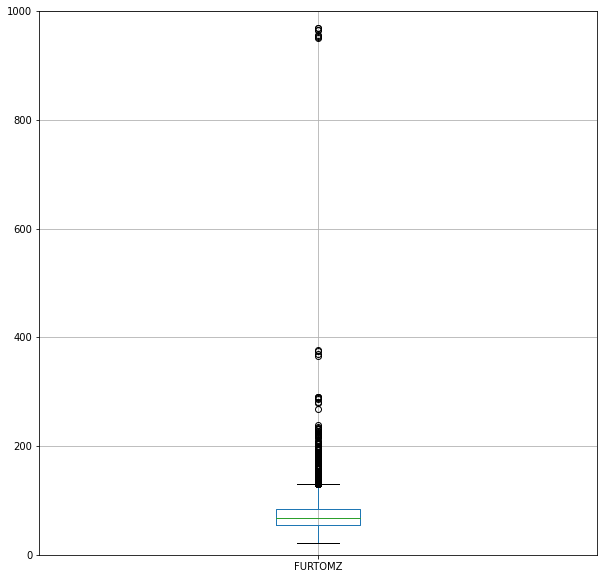

In [ ]:
ax = plt.figure(figsize=(10,10))
ax = data1.boxplot('FURTOMZ')
ax.set_ylim(0,1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f3a83ee50>,
      dtype=object)

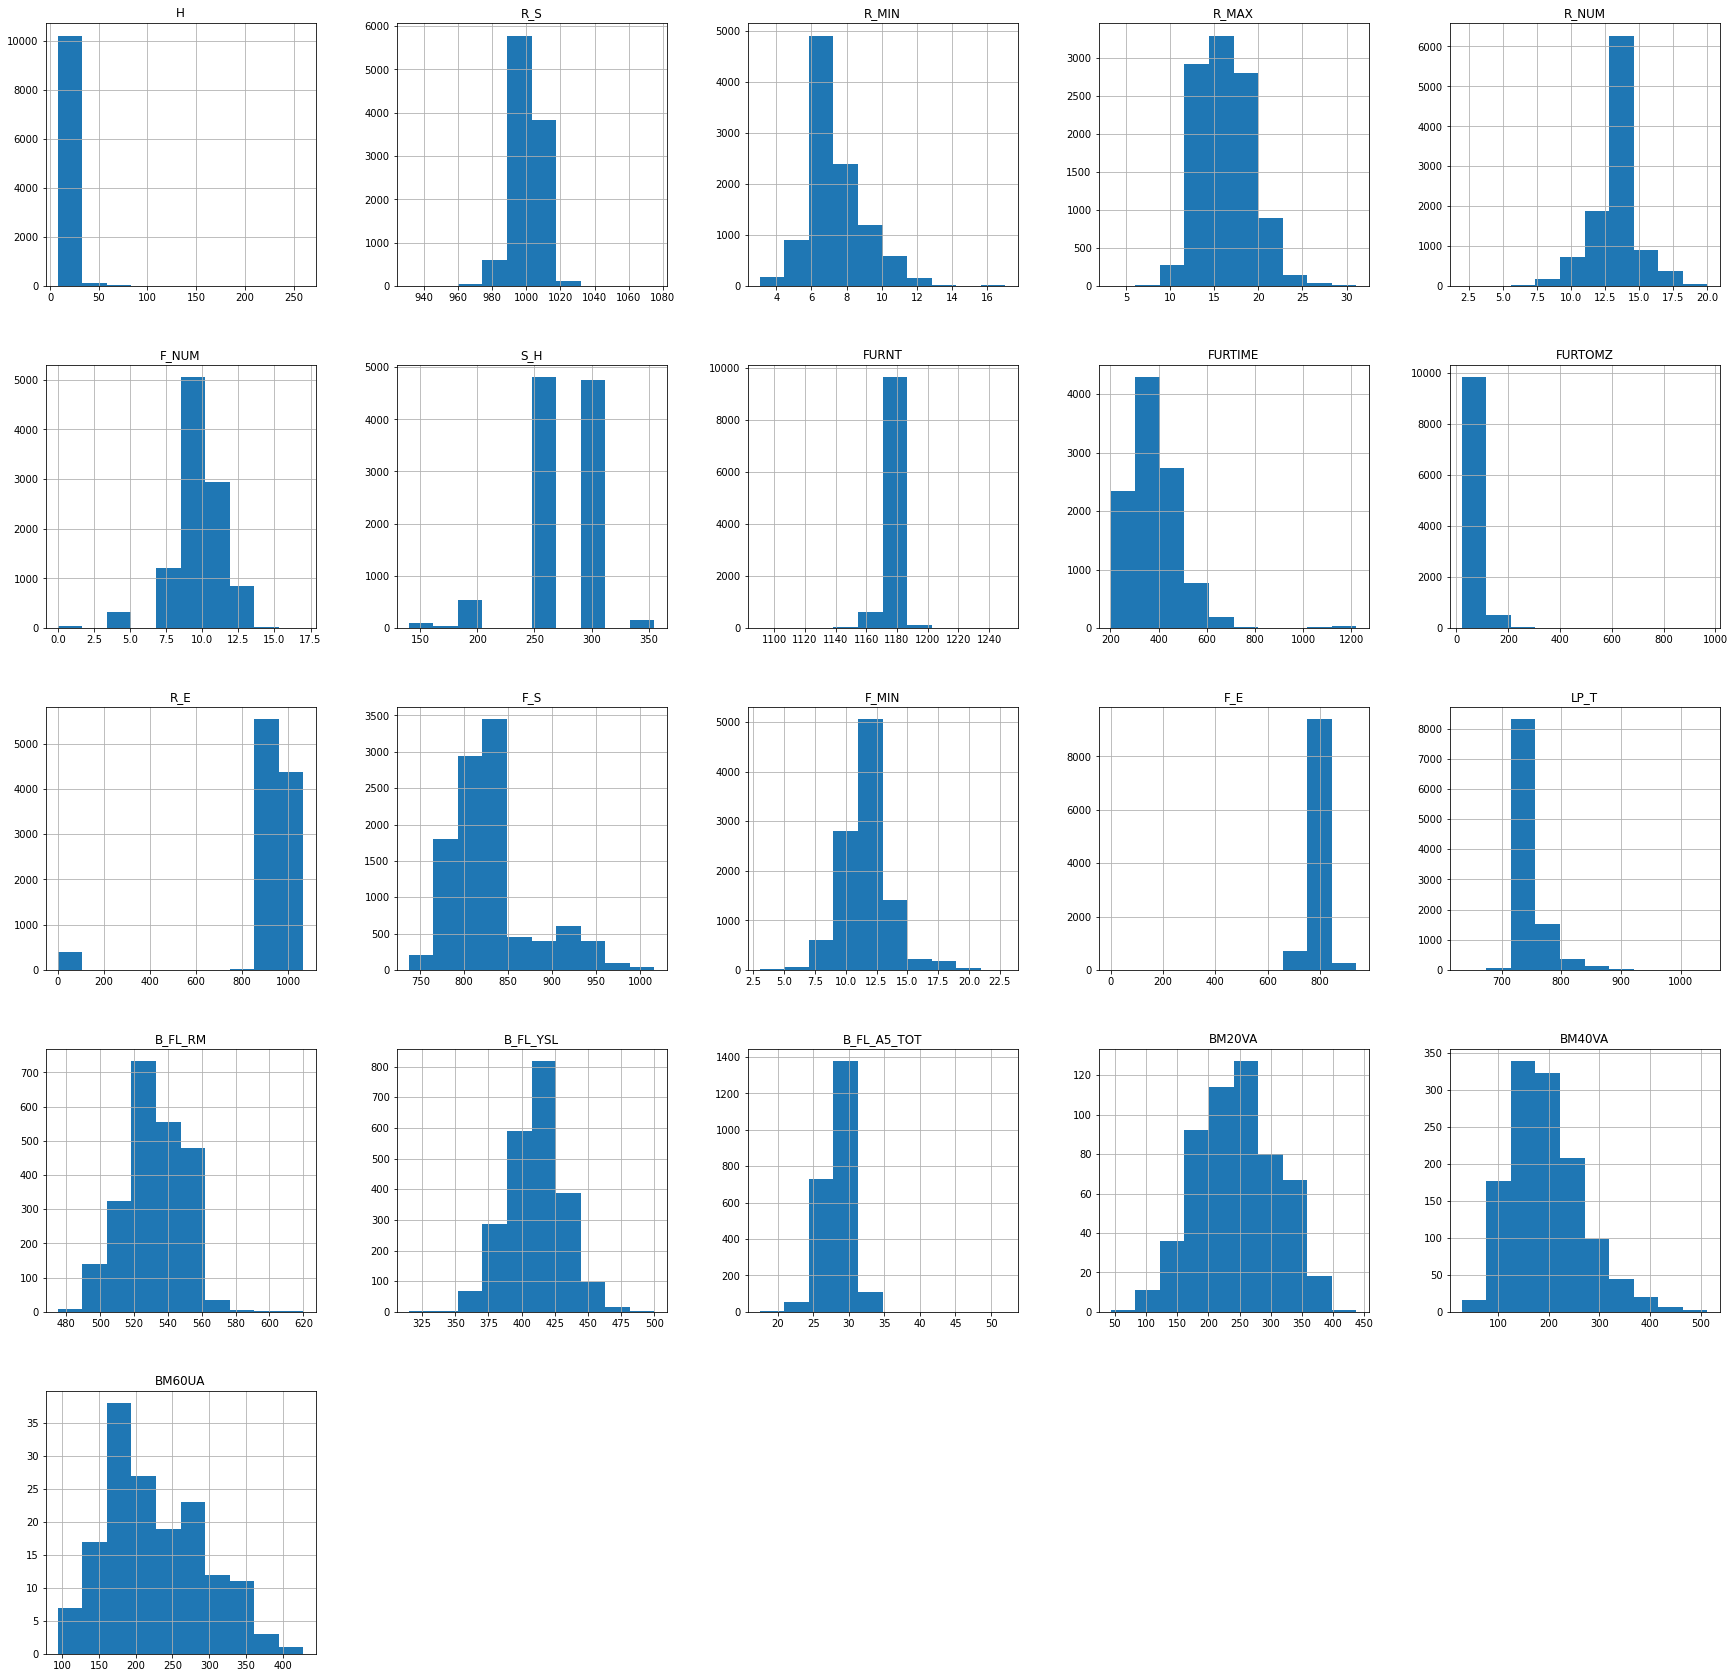

In [ ]:
# строим гистограммы, проверяем разброс значений
fig = plt.figure(figsize = (30,30))
ax = fig.gca()
data1.hist(ax = ax)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(0.0, 500.0)

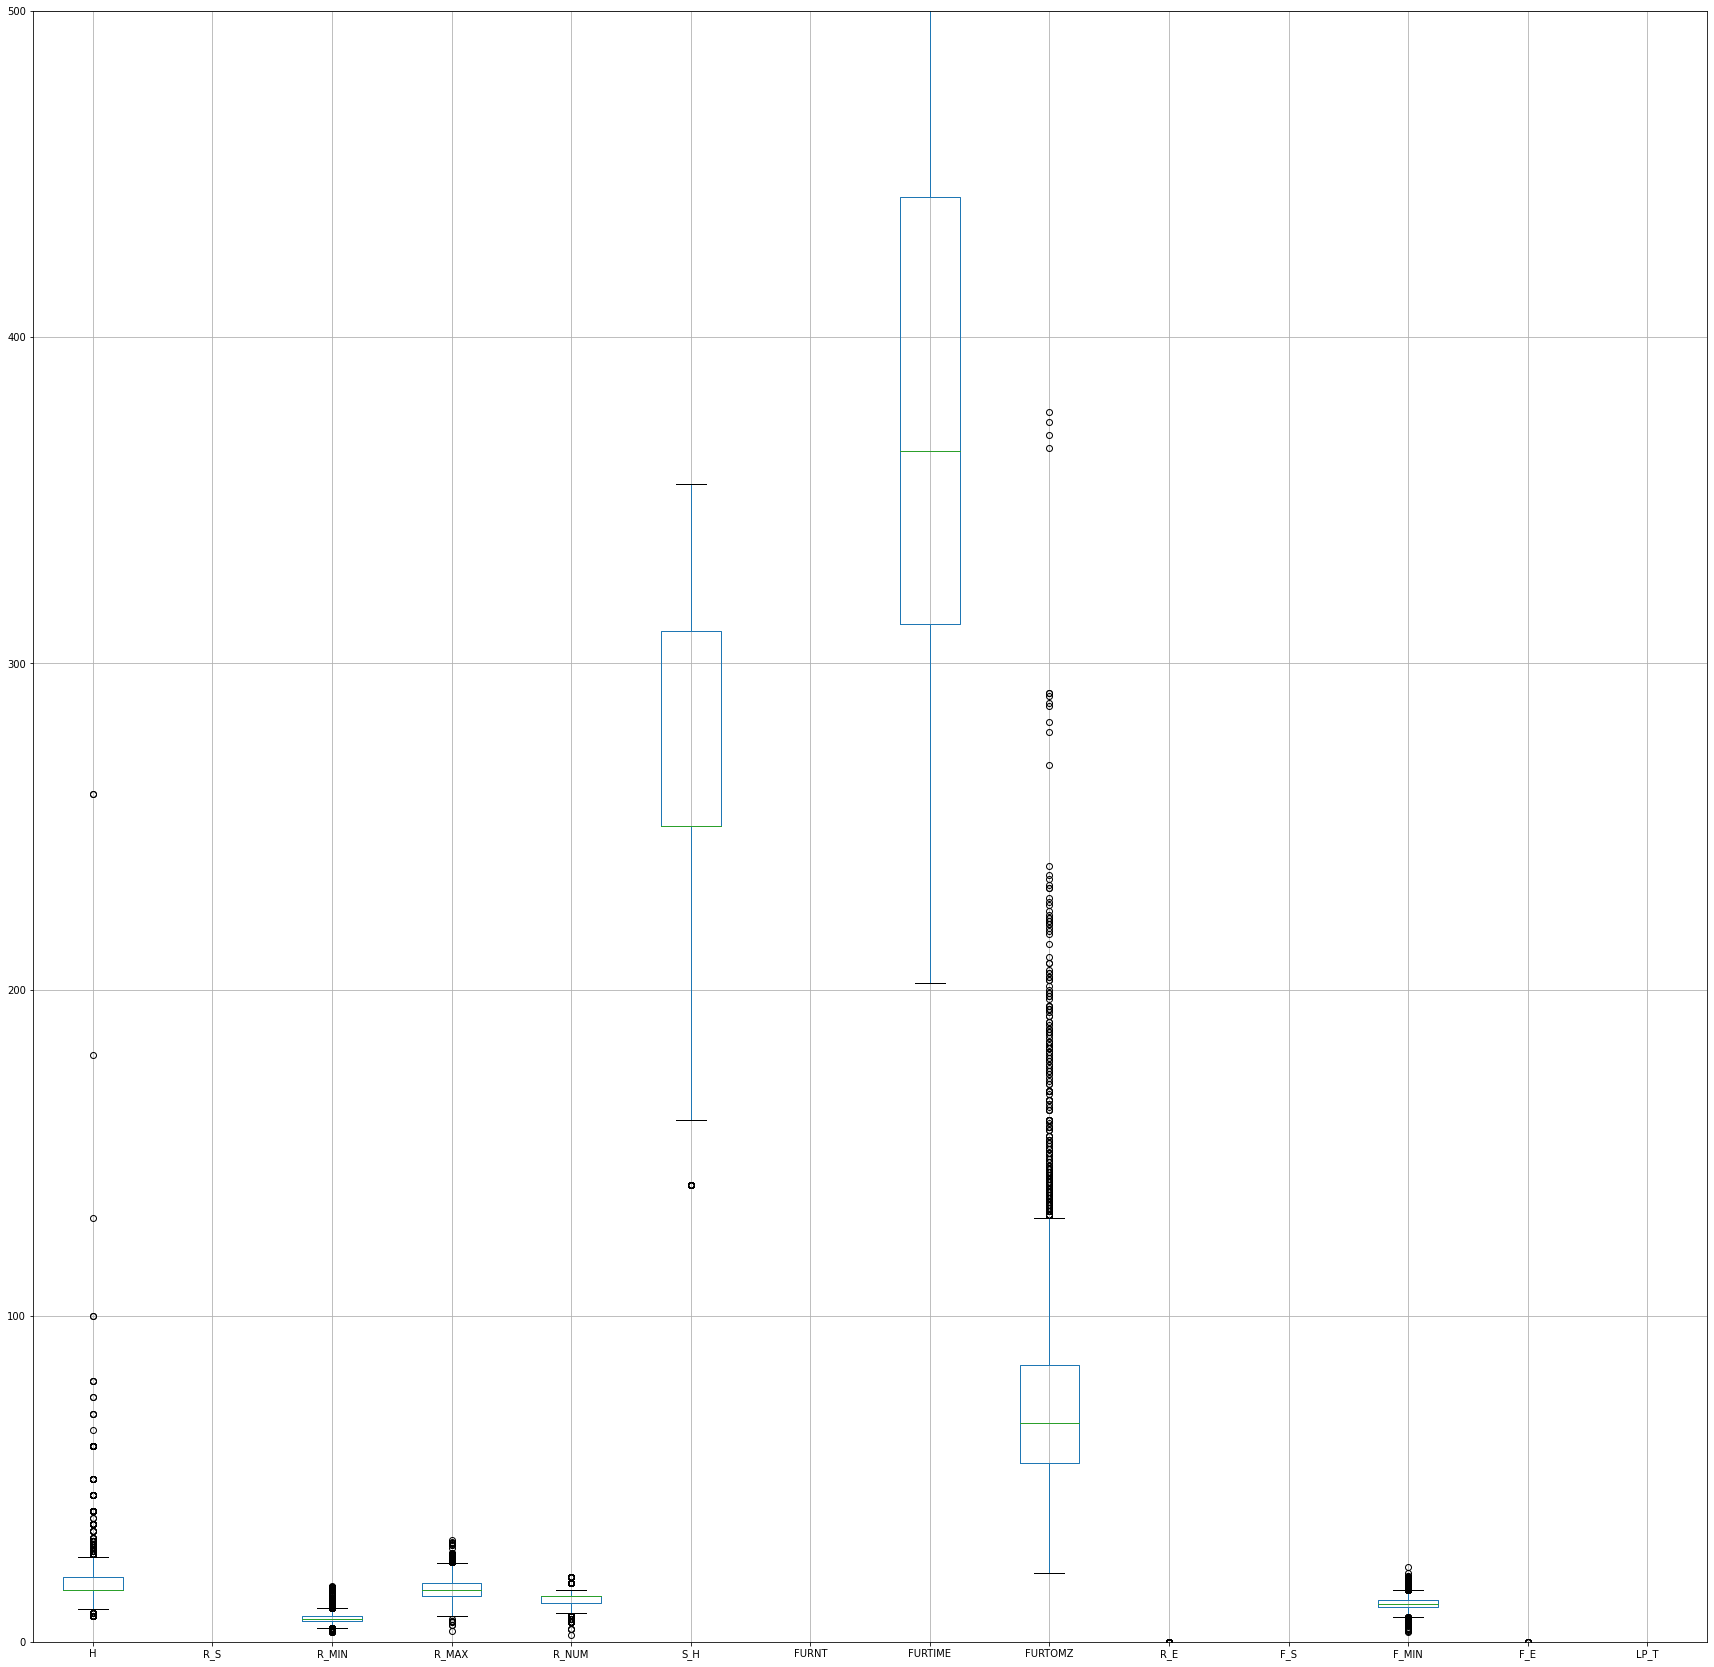

In [ ]:
# проверяем выбросы, после исключим эти строки (регрессия очень чувствительна к выбросам)
numeric_col = ["H","R_S","R_MIN","R_MAX","R_NUM","S_H","FURNT","FURTIME","FURTOMZ","R_E","F_S","F_MIN","F_E","LP_T"]
ax = plt.figure(figsize=(30,30))
ax = data1.boxplot(numeric_col)
ax.set_ylim(0,500)

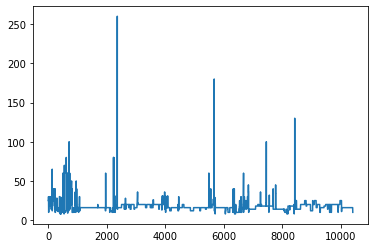

In [ ]:
# номинальная толщина плиты с выбросами на графике. 
# вручную исключаем выбросы 'Н', так как метод IQR сильно уменьшает диапазон показаний, исключая и хорошие значения 
data1.H.plot() 

In [ ]:

#data1 = data1.drop(np.where(data1['H'] > 50)[0])
# for x in data1["H"]:
#     if x>90:
#       print(x)

# data1.H.plot() 

In [ ]:
# Исключаем выбросы с помощью метода IQR
# расчет 1 и 3 квантиля и межквартильный диапазон

df_IQR_new = data1.copy(deep=True)
for i in numeric_col:
  Q1 =  df_IQR_new[i].quantile(0.1)
  Q3 = df_IQR_new[i].quantile(0.9)
  IQR = Q3 - Q1 
  df_IQR_new = df_IQR_new[(df_IQR_new[i] >= Q1-1.5*IQR) & (df_IQR_new[i] <= Q3+1.5*IQR)]
  

(0.0, 1000.0)

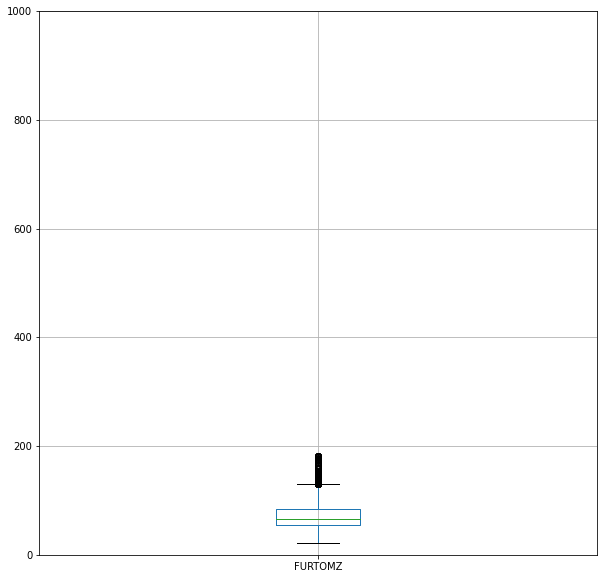

In [ ]:
ax = plt.figure(figsize=(10,10))
ax =  df_IQR_new.boxplot('FURTOMZ')
ax.set_ylim(0,1000)

In [ ]:
#data1.head()
# df_IQR_new.head()
df_IQR_new.describe()

,H,R_S,R_MIN,R_MAX,R_NUM,F_NUM,S_H,FURNT,FURTIME,FURTOMZ,R_E,F_S,F_MIN,F_E,LP_T,B_FL_RM,B_FL_YSL,B_FL_A5_TOT,BM20VA,BM40VA,BM60UA
count,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,1996.000000,1991.000000,1996.000000,524.000000,1056.000000,130.000000
mean,16.435955,1000.913607,7.450362,16.428512,13.684154,9.586696,275.090860,1178.998864,380.481233,70.950892,957.502888,827.980617,11.618515,763.088556,747.365668,532.815631,412.767454,28.228958,248.185115,193.276989,225.030769
std,3.145943,7.255242,1.517692,2.716715,1.596382,1.591904,35.479231,3.060239,85.057847,22.337406,20.851852,45.192153,1.561207,17.211759,14.979594,17.054772,20.406686,1.972348,63.229635,69.293193,67.260680
min,8.000000,964.500000,3.060000,9.360000,6.000000,5.000000,160.000000,1163.300000,202.000000,21.000000,848.500000,737.300000,6.120000,731.900000,683.400000,475.000000,355.000000,21.500000,106.000000,68.000000,113.000000
25%,16.000000,996.700000,6.530000,14.160000,14.000000,9.000000,250.000000,1177.400000,306.000000,55.000000,943.000000,797.800000,10.760000,754.400000,739.700000,520.000000,400.000000,27.000000,201.750000,143.000000,174.250000
50%,16.000000,1001.300000,7.070000,16.170000,14.000000,9.000000,250.000000,1179.100000,360.000000,66.000000,956.200000,820.800000,11.510000,757.400000,744.200000,540.000000,415.000000,28.000000,247.000000,182.750000,208.500000
75%,18.000000,1005.400000,7.970000,18.200000,14.000000,11.000000,310.000000,1180.800000,435.000000,85.000000,971.200000,837.500000,12.620000,763.200000,749.400000,540.000000,425.000000,30.000000,290.000000,231.250000,271.000000
max,32.000000,1032.200000,15.320000,28.900000,20.000000,15.000000,355.000000,1192.000000,752.000000,182.000000,1027.900000,1012.000000,18.580000,859.000000,823.100000,580.000000,490.000000,52.000000,396.000000,513.000000,428.000000


(0.0, 20.0)

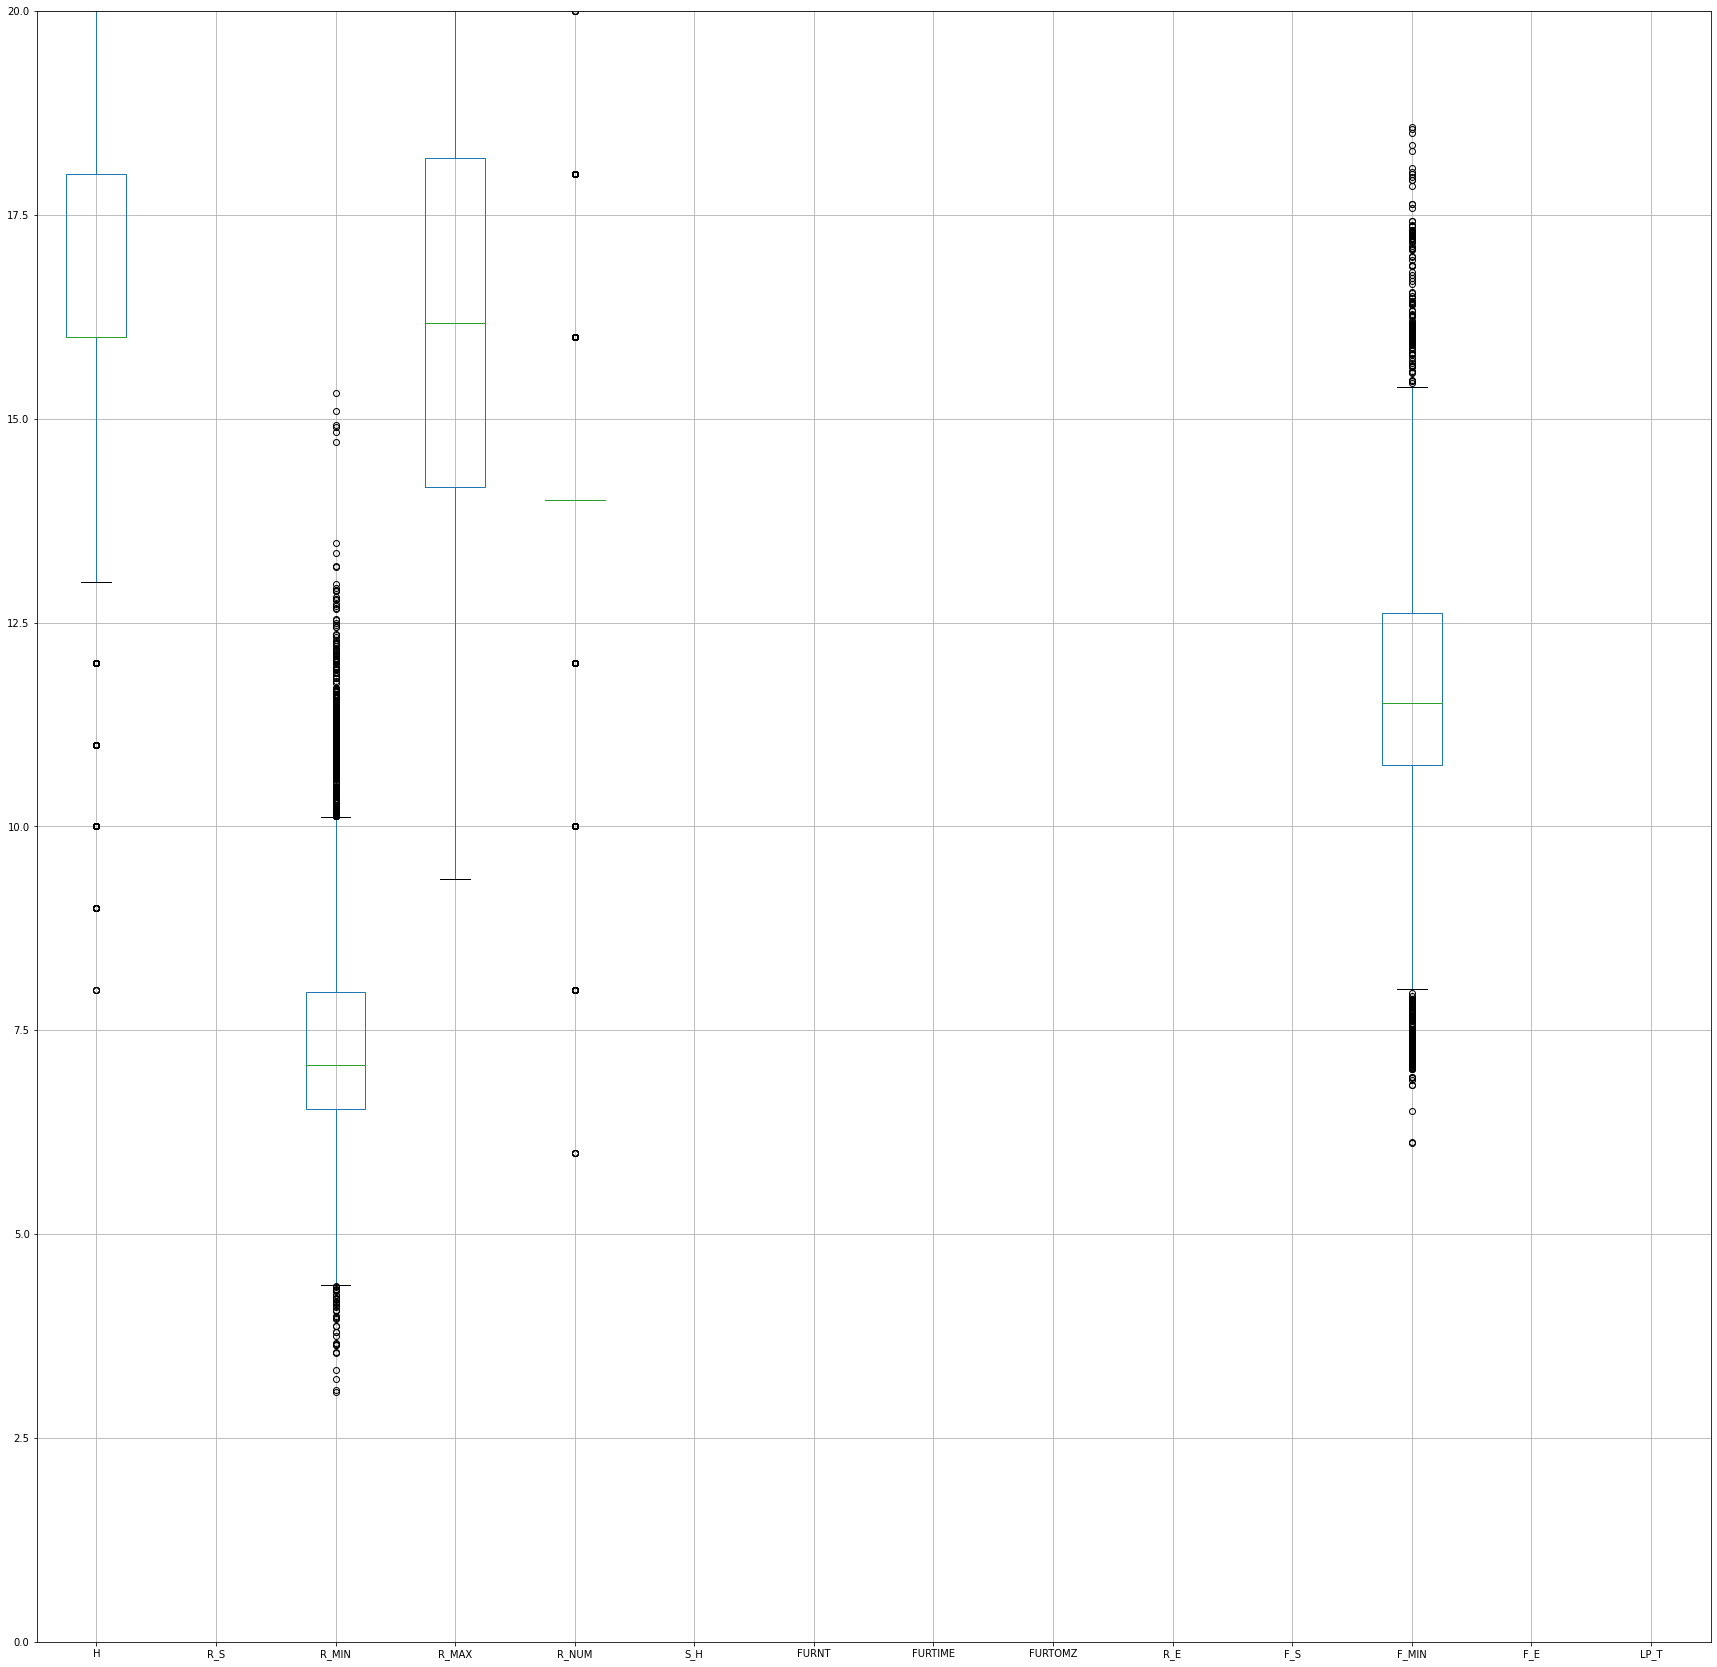

In [ ]:
# убеждаемся, что все значения в своих "коробках"
ax = plt.figure(figsize=(30,30))
ax = df_IQR_new.boxplot(numeric_col)
ax.set_ylim(0,20)

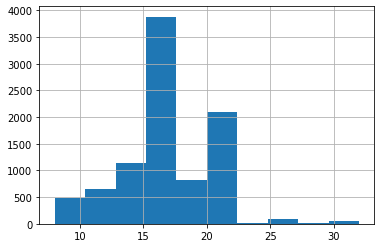

In [ ]:

df_IQR_new.H.hist() 

In [ ]:

# сколько показаний отсутствует
data1.isna().sum()

H                  0
R_S                2
R_MIN              2
R_MAX              2
R_NUM              2
F_NUM              2
S_H                6
FURNT              6
FURTIME            6
FURTOMZ            6
R_E               83
F_S               41
F_MIN             41
F_E               44
LP_T              44
B_FL_RM         8129
B_FL_YSL        8138
B_FL_A5_TOT     8129
BM20VA          9861
BM40VA          9173
BM60UA         10250
dtype: int64

In [ ]:
df_IQR_new_FURTIME = df_IQR_new['FURTIME'].copy(deep=True)
df_IQR_new_FURTIME_1000 = df_IQR_new_FURTIME[0:999] 

In [ ]:
import scipy
stat, p = scipy.stats.shapiro(df_IQR_new_FURTIME_1000) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.912, p-value=0.000
Отклонить гипотезу о нормальности


In [ ]:
# восстанавливаем пропуски в 'х' методом среднего
# columns = list(data1)
# numeric_col = ["R_S","R_MIN","R_MAX","R_NUM","F_NUM","S_H","FURNT","FURTIME","FURTOMZ","R_E","F_S","F_MIN","F_MAX","F_E","LP_T","ACCENTEMP2","ACCLAMICR2"]
for i in numeric_col:
  df_IQR_new[i].fillna((df_IQR_new[i].mean()), inplace=True) 

In [ ]:

# pip install 
# from sklearn.preprocessing import Imputer

# imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
# imp.fit(df_IQR_new)
# train= imp.transform(df_IQR_new)

In [ ]:
df_IQR_new.describe()

,H,R_S,R_MIN,R_MAX,R_NUM,F_NUM,S_H,FURNT,FURTIME,FURTOMZ,R_E,F_S,F_MIN,F_E,LP_T,B_FL_RM,B_FL_YSL,B_FL_A5_TOT,BM20VA,BM40VA,BM60UA
count,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,1996.000000,1991.000000,1996.000000,524.000000,1056.000000,130.000000
mean,16.435955,1000.913607,7.450362,16.428512,13.684154,9.586696,275.090860,1178.998864,380.481233,70.950892,957.502888,827.980617,11.618515,763.088556,747.365668,532.815631,412.767454,28.228958,248.185115,193.276989,225.030769
std,3.145943,7.255242,1.517692,2.716715,1.596382,1.591904,35.479231,3.060239,85.057847,22.337406,20.851852,45.192153,1.561207,17.211759,14.979594,17.054772,20.406686,1.972348,63.229635,69.293193,67.260680
min,8.000000,964.500000,3.060000,9.360000,6.000000,5.000000,160.000000,1163.300000,202.000000,21.000000,848.500000,737.300000,6.120000,731.900000,683.400000,475.000000,355.000000,21.500000,106.000000,68.000000,113.000000
25%,16.000000,996.700000,6.530000,14.160000,14.000000,9.000000,250.000000,1177.400000,306.000000,55.000000,943.000000,797.800000,10.760000,754.400000,739.700000,520.000000,400.000000,27.000000,201.750000,143.000000,174.250000
50%,16.000000,1001.300000,7.070000,16.170000,14.000000,9.000000,250.000000,1179.100000,360.000000,66.000000,956.200000,820.800000,11.510000,757.400000,744.200000,540.000000,415.000000,28.000000,247.000000,182.750000,208.500000
75%,18.000000,1005.400000,7.970000,18.200000,14.000000,11.000000,310.000000,1180.800000,435.000000,85.000000,971.200000,837.500000,12.620000,763.200000,749.400000,540.000000,425.000000,30.000000,290.000000,231.250000,271.000000
max,32.000000,1032.200000,15.320000,28.900000,20.000000,15.000000,355.000000,1192.000000,752.000000,182.000000,1027.900000,1012.000000,18.580000,859.000000,823.100000,580.000000,490.000000,52.000000,396.000000,513.000000,428.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f3b9eab10>,
      dtype=object)

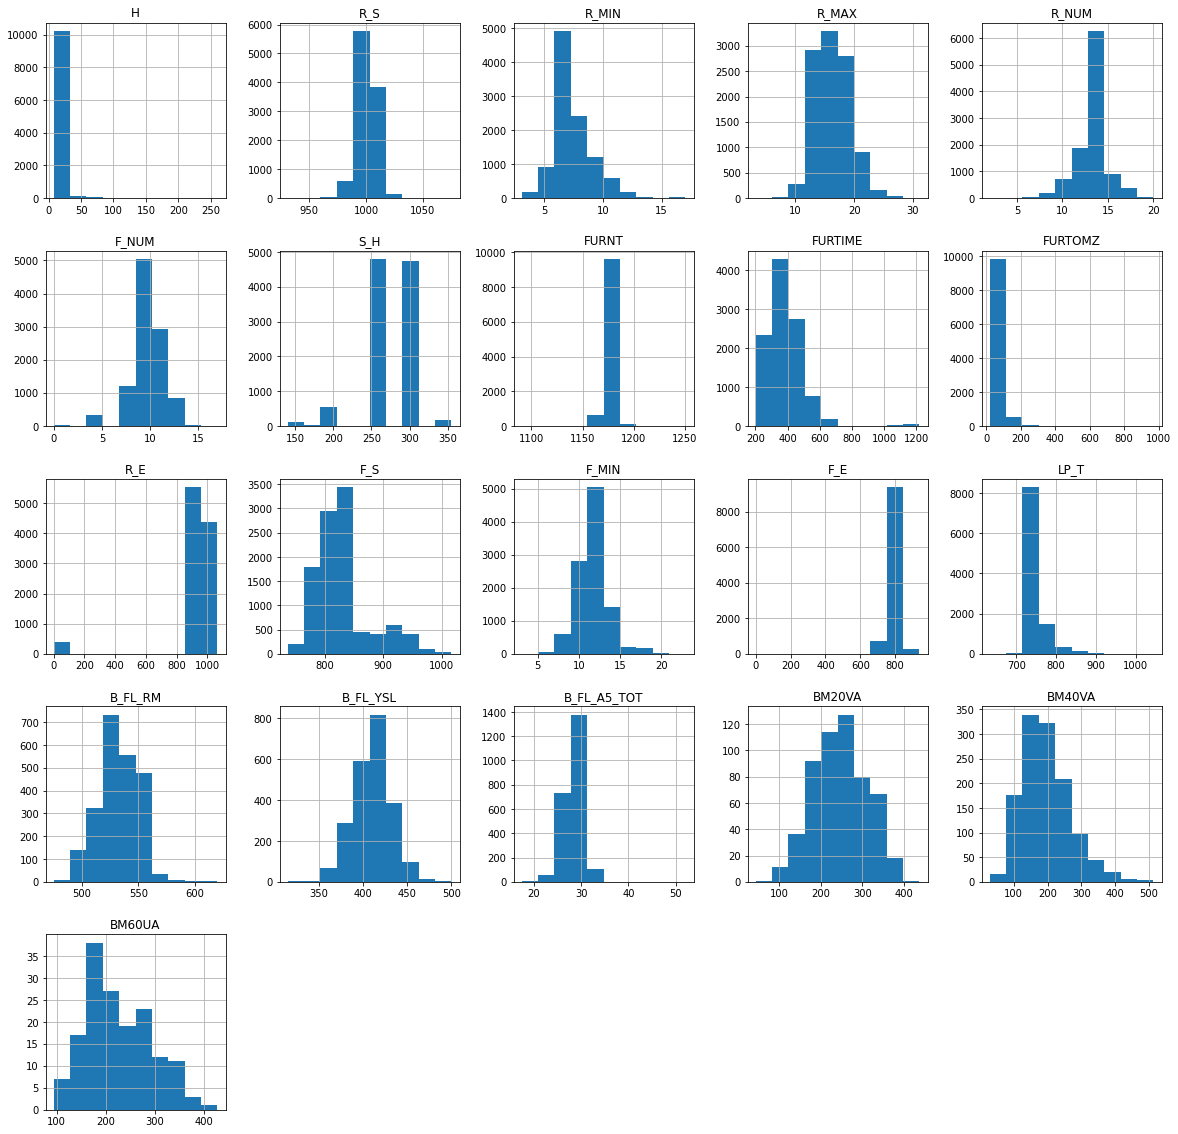

In [ ]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
data1.hist(ax = ax)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f39bd11d0>,
      dtype=object)

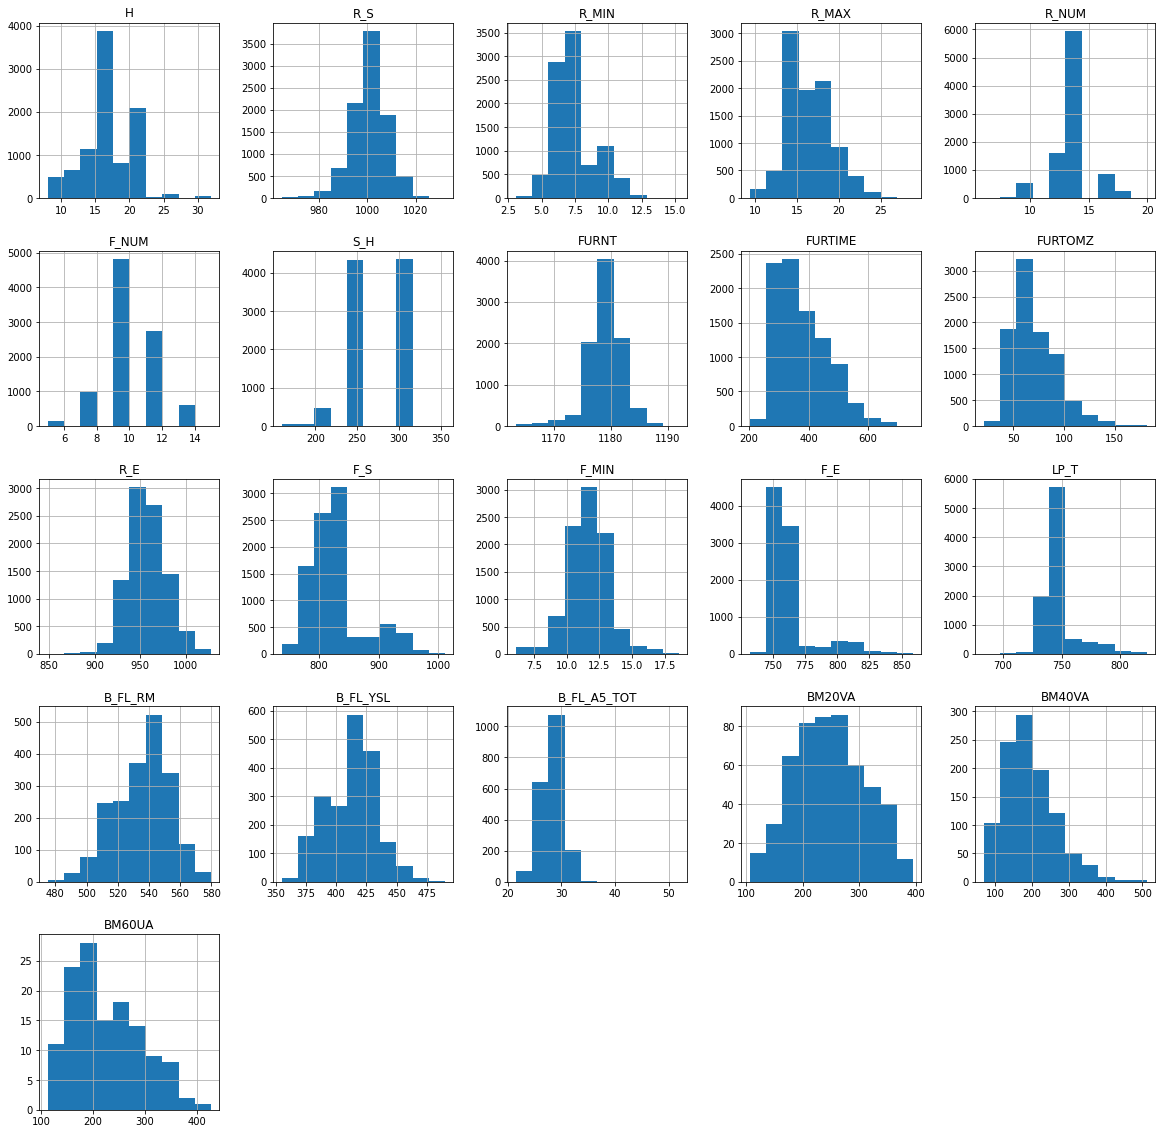

In [ ]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df_IQR_new.hist(ax = ax)

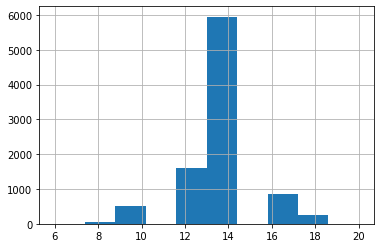

In [ ]:
df_IQR_new["R_NUM"].hist() # не влияет на анализ, удаляем этот столбец? ДА!

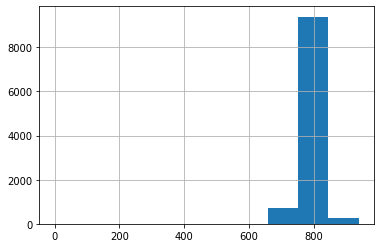

In [ ]:
data1.F_E.hist() 

Целевые переменные 'y':

B_FL_RM - 228 / 10400   
B_FL_YSL - 2272  
B_FL_A5_TOT - 2281  
BM20VA - 549  
BM40VA - 1237  
BM60UA - 160

In [ ]:
print("B_FL_RM")
print("Кол-во строк в массиве: ", df_IQR_new["B_FL_RM"].shape)
print("Кол-во Nun: ", df_IQR_new["B_FL_RM"].isna().sum(), "\n")

print("B_FL_YSL")
print(df_IQR_new["B_FL_YSL"].shape)
print(df_IQR_new["B_FL_YSL"].isna().sum(), "\n")

print("B_FL_A5_TOT")
print('Всего', df_IQR_new["B_FL_A5_TOT"].shape)
print('Отсутствуют', df_IQR_new["B_FL_A5_TOT"].isna().sum(), "\n")

print("B_FL_YSL")
print(df_IQR_new["BM20VA"].shape)
print(df_IQR_new["BM20VA"].isna().sum(), "\n")

print("BM40VA")
print(df_IQR_new["BM40VA"].shape)
print(df_IQR_new["BM40VA"].isna().sum(), "\n")

print("BM60UA")
print(df_IQR_new["BM60UA"].shape)
print(df_IQR_new["BM60UA"].isna().sum(), "\n")


B_FL_RM
Кол-во строк в массиве:  (9245,)
Кол-во Nun:  7249 

B_FL_YSL
(9245,)
7254 

B_FL_A5_TOT
Всего (9245,)
Отсутствуют 7249 

B_FL_YSL
(9245,)
8721 

BM40VA
(9245,)
8189 

BM60UA
(9245,)
9115 



  Алгоритмы обучения:
*   Linear Regression
*   Random Rorest
*   XGboost
*   LassoCV
*   RidgeCV
*   ElasticNetCV

In [ ]:
df_IQR_new

,H,R_S,R_MIN,R_MAX,R_NUM,F_NUM,S_H,FURNT,FURTIME,FURTOMZ,R_E,F_S,F_MIN,F_E,LP_T,B_FL_RM,B_FL_YSL,B_FL_A5_TOT,BM20VA,BM40VA,BM60UA
5,10.0,1006.9,10.17,25.60,10.0,7.0,250.0,1169.1,244.0,36.0,1013.7,1001.9,11.96,842.5,789.0,520.0,375.0,29.0,NaN,NaN,NaN
6,10.0,1005.5,10.17,25.75,10.0,7.0,250.0,1169.1,247.0,41.0,1018.7,1000.9,11.71,838.5,778.3,NaN,NaN,NaN,NaN,NaN,NaN
7,10.0,1005.0,10.12,25.75,10.0,7.0,250.0,1171.7,251.0,36.0,1006.0,996.1,11.60,833.4,775.7,NaN,NaN,NaN,NaN,NaN,NaN
8,10.0,1015.7,10.19,25.64,10.0,7.0,250.0,1172.0,253.0,42.0,1012.6,994.5,11.43,831.8,771.8,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,1012.5,10.24,25.87,10.0,7.0,250.0,1174.1,251.0,38.0,1015.1,1012.0,11.34,835.7,783.5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10403,16.0,1009.9,6.03,18.82,14.0,9.0,250.0,1177.3,295.0,46.0,941.9,837.7,11.27,768.0,748.4,NaN,NaN,NaN,NaN,NaN,NaN
10404,10.0,1007.6,12.33,15.92,10.0,7.0,200.0,1171.7,266.0,38.0,967.7,963.2,11.22,758.1,728.9,540.0,430.0,27.0,NaN,NaN,NaN
10405,10.0,1009.1,12.53,15.77,10.0,7.0,200.0,1172.7,268.0,43.0,962.0,956.1,10.42,760.1,741.6,530.0,420.0,28.0,NaN,NaN,NaN
10406,10.0,1016.4,12.45,15.77,10.0,7.0,200.0,1183.1,267.0,39.0,969.2,957.6,11.84,767.5,738.0,530.0,410.0,28.0,NaN,NaN,NaN


### 1. y = B_FL_RM - временное сопротивление, в середине, плоский образец, поперечный (без выбросов)


In [ ]:
df_IQR_new

,H,R_S,R_MIN,R_MAX,R_NUM,F_NUM,S_H,FURNT,FURTIME,FURTOMZ,R_E,F_S,F_MIN,F_E,LP_T,B_FL_RM,B_FL_YSL,B_FL_A5_TOT,BM20VA,BM40VA,BM60UA
5,10.0,1006.9,10.17,25.60,10.0,7.0,250.0,1169.1,244.0,36.0,1013.7,1001.9,11.96,842.5,789.0,520.0,375.0,29.0,NaN,NaN,NaN
6,10.0,1005.5,10.17,25.75,10.0,7.0,250.0,1169.1,247.0,41.0,1018.7,1000.9,11.71,838.5,778.3,NaN,NaN,NaN,NaN,NaN,NaN
7,10.0,1005.0,10.12,25.75,10.0,7.0,250.0,1171.7,251.0,36.0,1006.0,996.1,11.60,833.4,775.7,NaN,NaN,NaN,NaN,NaN,NaN
8,10.0,1015.7,10.19,25.64,10.0,7.0,250.0,1172.0,253.0,42.0,1012.6,994.5,11.43,831.8,771.8,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,1012.5,10.24,25.87,10.0,7.0,250.0,1174.1,251.0,38.0,1015.1,1012.0,11.34,835.7,783.5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10403,16.0,1009.9,6.03,18.82,14.0,9.0,250.0,1177.3,295.0,46.0,941.9,837.7,11.27,768.0,748.4,NaN,NaN,NaN,NaN,NaN,NaN
10404,10.0,1007.6,12.33,15.92,10.0,7.0,200.0,1171.7,266.0,38.0,967.7,963.2,11.22,758.1,728.9,540.0,430.0,27.0,NaN,NaN,NaN
10405,10.0,1009.1,12.53,15.77,10.0,7.0,200.0,1172.7,268.0,43.0,962.0,956.1,10.42,760.1,741.6,530.0,420.0,28.0,NaN,NaN,NaN
10406,10.0,1016.4,12.45,15.77,10.0,7.0,200.0,1183.1,267.0,39.0,969.2,957.6,11.84,767.5,738.0,530.0,410.0,28.0,NaN,NaN,NaN


In [ ]:
data_x = df_IQR_new.copy(deep=True)
list_y = ['B_FL_RM','B_FL_YSL', 'B_FL_A5_TOT', 'BM20VA', 'BM40VA','BM60UA']
for i in list_y:
  del data_x[i]

data_y = pd.DataFrame()
data_y[['B_FL_RM', 'B_FL_YSL', 'B_FL_A5_TOT', 'BM20VA', 'BM40VA','BM60UA']] = df_IQR_new[['B_FL_RM', 'B_FL_YSL', 'B_FL_A5_TOT', 'BM20VA', 'BM40VA','BM60UA']]

In [ ]:
data_x[["B_FL_RM"]] = data_y[["B_FL_RM"]]
# все х усредненные значения, исключены строки где у=Nun 
data_x = data_x[df_IQR_new["B_FL_RM"].notna()]
# разбиваем на х и у
y=data_x["B_FL_RM"]
del data_x["B_FL_RM"]
x=data_x

In [ ]:
# разбиваем на тестовую и тренировочные выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

# алгоритм линейная регрессия L(1+)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# прогнозируем результаты 
y_pred = regressor.predict(X_test)

# метрика "Объяснимая дисперсия" измеряет степень, в которой модель учитывает вариацию целевой переменной. случайная изменчивость и целенаправлеенная 
# Это процент уменьшения дисперсии исходных данных по отношению к дисперсии ошибок"
from sklearn.metrics import r2_score
print("Линейная регрессия:" "\n" "Точность = ",r2_score(y_test, y_pred))

# MSE средняя квадратическая ошибка
from sklearn.metrics import mean_squared_error
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))    


Линейная регрессия:
Точность =  0.5250057710935544
MSE =  12.016447364067135
RMSE =  3.4664747747628475


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("\n" "Random Forest:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))


Random Forest:
Точность =  0.7005845014016819
MSE =  9.540454405858783
RMSE =  3.0887626010845803


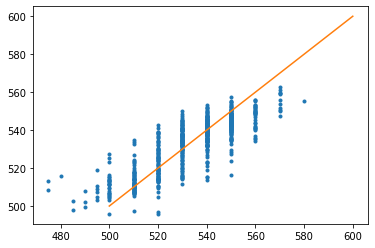

In [ ]:
y_pred = regressor.predict(X_test)
plt.plot(y_test, y_pred, '.')

x=np.linspace(500,600)
y=x
plt.plot(x,y)
plt.show()

# Подбор гиперпараметров для RandomForest

In [ ]:
val_score = []
for i in range(1, 25):
  clf = RandomForestRegressor(max_depth = i)
  clf.fit(X_train, y_train) 
  y_pred = clf.predict(X_test)
  mse_score = mean_squared_error(y_test, y_pred, squared=False)

  val_score.append(mse_score)

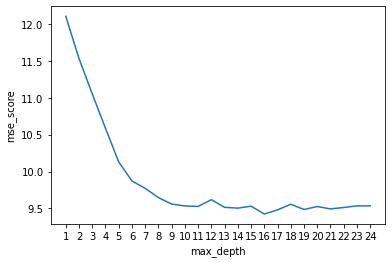

In [ ]:
plt.plot(list(range(1, 25)), val_score)
plt.xticks(list(range(1, 25)))
plt.xlabel("max_depth")
plt.ylabel("mse_score")
plt.show()

In [ ]:
val_score = []
for i in range(100, 1500, 100):
  clf = RandomForestRegressor(n_estimators = i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  mse_score = mean_squared_error(y_test, y_pred, squared=False)

  val_score.append(mse_score)

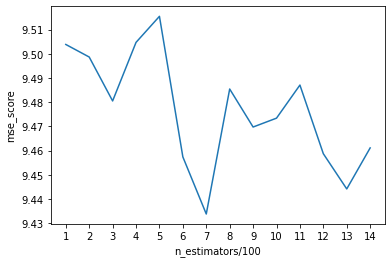

In [ ]:
plt.plot(list(range(1, 15)), val_score)
plt.xticks(list(range(1, 15)))
plt.xlabel("n_estimators/100")
plt.ylabel("mse_score")
plt.show()

In [ ]:
clf = RandomForestRegressor()
parametres = {
              'max_depth': [12, 19, 23],
              'n_estimators': [500, 700, 1000]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:

cv_clf = GridSearchCV(clf, parametres, cv=5, scoring='neg_mean_squared_error', 
                     n_jobs=-1, verbose=10) 

In [ ]:
%%time
best_clf = cv_clf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
CPU times: user 7.72 s, sys: 197 ms, total: 7.91 s
Wall time: 3min 12s


In [ ]:
best_clf.best_params_

In [ ]:
model = RandomForestRegressor(max_depth = 13, n_estimators=1100, criterion = 'squared_error')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n" "Random Forest:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))


Random Forest:
Точность =  0.7049493134047919
MSE =  9.470659806950692
RMSE =  3.077443713043456


In [ ]:
print(np.mean(y))
print(np.mean(y_pred))

550.0
532.5040709578515


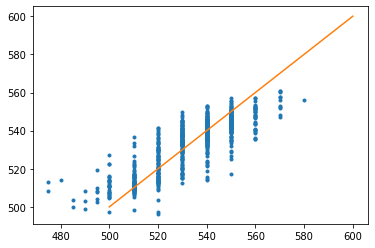

In [ ]:
y_pred = model.predict(X_test)
plt.plot(y_test, y_pred, '.')

x=np.linspace(500,600)
y=x
plt.plot(x,y)
plt.show()

## Попытка улучшить за счёт других параметров

In [ ]:
val_score = []
for i in range(2, 10):
  clf = RandomForestRegressor(min_samples_split = i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  mse_score = mean_squared_error(y_test, y_pred, squared=False)

  val_score.append(mse_score)

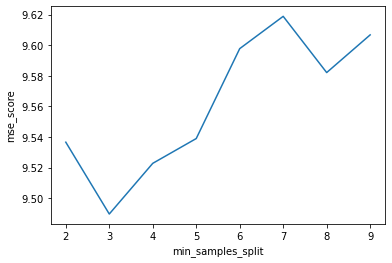

In [ ]:
plt.plot(list(range(2, 10)), val_score)
plt.xticks(list(range(2, 10)))
plt.xlabel("min_samples_split")
plt.ylabel("mse_score")
plt.show()

In [ ]:
val_score = []
for i in range(1, 6):
  clf = RandomForestRegressor(min_samples_leaf = i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  mse_score = mean_squared_error(y_test, y_pred, squared=False)

  val_score.append(mse_score)

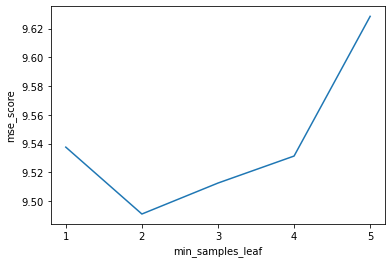

In [ ]:
plt.plot(list(range(1, 6)), val_score)
plt.xticks(list(range(1, 6)))
plt.xlabel("min_samples_leaf")
plt.ylabel("mse_score")
plt.show()

In [ ]:
def search_and_draw (X, y, parametres, param_scale = 'ordinary', draw=True):
  #parametres = {param_name : grid}

  CV_model = GridSearchCV(#estimator= model,
                          param_grid=parametres,
                          cv=5,
                          scoring='neg_mean_squared_error',
                          n_jobs=-1,
                          verbose=10)
  CV_model.fit(X, y)
  means = CV_model.cv_results_['mean_test_score']
  error = CV_model.cv_results_['std_test_score']

  #if draw:
   # plt.figure(figsize=(15,8))
    #plt.title('choose' + param_name)

    #if(param_scale== 'log'):
     # plt.xscale('log')

    #plt.plot(grid, means, label='mean values of score', color='red', lw=3)

    #plt.fill_between(grid, means - 2*error, means+2*error,
     #                color='green', label='filled area between errors', alpha=0.5)
    #legend_box = plt.legend(framealpha=1).get_frame()
    #legend_box.set_facecolor("white")
    #legend_box.set_edgecolor("black")
    #plt.xlabel('parameter')

    #plt.show()

  return means, error  

In [ ]:
clf = RandomForestRegressor()
parametres = {
              'min_samples_leaf': [3, 5, 8],
              'mse_score': range (3, 5, 1)
}

In [ ]:

cv_clf = GridSearchCV(clf, parametres, cv=5, scoring='neg_mean_squared_error', 
                     n_jobs=-1, verbose=10) 

In [ ]:
%%time
best_clf = cv_clf.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


ValueError: ignored

In [ ]:
# XGBoost - алгоритм градиентного бустинга деревьев решений.

import xgboost as xgb
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import StratifiedKFold

clf = xgb.XGBClassifier(max_depth=3, min_child_weight=1, gamma=0, colsample_bytree=0.6, subsample=0.6, learning_rate=0.01)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]

print("XGboost:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

XGboost:
Точность =  0.5649746362301429
MSE =  11.499771508371143


In [ ]:
# Гребневая регрессия (ридж-регрессия) - один из методов понижения размерности. 
# Применяется для борьбы с избыточностью данных, когда независимые переменные коррелируют друг с другом, вследствие чего проявляется неустойчивость оценок коэффициентов многомерной линейной регрессии.

from sklearn.linear_model import RidgeCV
model = RidgeCV()
model.fit(X_train, y_train)

# прогнозируем результаты 
y_pred = model.predict(X_test)
print("Ridge:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))

Ridge:
Точность =  0.5251029761312966
MSE =  12.015217750196216
RMSE =  3.4662974122536307


In [ ]:
# ElasticNet стремится объединить лучшее из гребневой регрессии и регрессии лассо, комбинируя регуляризацию L1 и L2

from sklearn.linear_model import ElasticNetCV
model = ElasticNetCV()
model.fit(X_train, y_train)

# прогнозируем результаты 
y_pred = model.predict(X_test)
print("ElasticNet:" "\n" "Точность = ",explained_variance_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))

# CatBoost

In [ ]:
!pip install catboost
#import catboost as cb

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
from catboost import CatBoostRegressor
# Initialize CatBoostRegressor
model = CatBoostRegressor()
# Fit model
#model.fit(X_train, y_train)
model.fit(X_train, y_train,
          use_best_model=True, plot=True)

print("Count of trees in model = {}".format(model.tree_count_))

# прогнозируем результаты 
y_pred = model.predict(X_test)


print("CatBoost:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

You should provide test set for use best model. use_best_model parameter has been switched to false value.


Learning rate set to 0.04283
0:	learn: 16.4674758	total: 81ms	remaining: 1m 20s
1:	learn: 16.0975383	total: 89.7ms	remaining: 44.8s
2:	learn: 15.7443865	total: 101ms	remaining: 33.6s
3:	learn: 15.4344247	total: 133ms	remaining: 33s
4:	learn: 15.1273209	total: 151ms	remaining: 30.1s
5:	learn: 14.8350849	total: 168ms	remaining: 27.8s
6:	learn: 14.5615776	total: 179ms	remaining: 25.3s
7:	learn: 14.2841456	total: 193ms	remaining: 23.9s
8:	learn: 14.0206099	total: 222ms	remaining: 24.5s
9:	learn: 13.7759066	total: 231ms	remaining: 22.9s
10:	learn: 13.5339652	total: 238ms	remaining: 21.4s
11:	learn: 13.3128962	total: 254ms	remaining: 20.9s
12:	learn: 13.1235262	total: 265ms	remaining: 20.1s
13:	learn: 12.9293810	total: 270ms	remaining: 19s
14:	learn: 12.7545973	total: 273ms	remaining: 17.9s
15:	learn: 12.5850710	total: 277ms	remaining: 17s
16:	learn: 12.4382777	total: 287ms	remaining: 16.6s
17:	learn: 12.2865409	total: 301ms	remaining: 16.4s
18:	learn: 12.1193410	total: 312ms	remaining: 16.1

In [ ]:
data_y

,B_FL_RM,B_FL_YSL,B_FL_A5_TOT,BM20VA,BM40VA,BM60UA
5,520.0,375.0,29.0,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10403,NaN,NaN,NaN,NaN,NaN,NaN
10404,540.0,430.0,27.0,NaN,NaN,NaN
10405,530.0,420.0,28.0,NaN,NaN,NaN
10406,530.0,410.0,28.0,NaN,NaN,NaN


### 2. y = B_FL_YSL - нижний предел текучести, на середине, плоский образец, поперечный

In [ ]:
data_x[["B_FL_YSL"]] = data_y[["B_FL_YSL"]]
# все х усредненные значения, исключены строки где у=Nun 
data_x = data_x[df_IQR_new["B_FL_YSL"].notna()]
# разбиваем на х и у
y=data_x["B_FL_YSL"]
del data_x["B_FL_YSL"]
x=data_x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
len(x
    )

1991

In [ ]:
len(y)

1991

In [ ]:
data_x

,H,R_S,R_MIN,R_MAX,R_NUM,F_NUM,S_H,FURNT,FURTIME,FURTOMZ,R_E,F_S,F_MIN,F_E,LP_T
5,10.0,1006.9,10.17,25.60,10.0,7.0,250.0,1169.1,244.0,36.0,1013.7,1001.9,11.96,842.5,789.0
10,10.0,1020.5,10.30,25.77,10.0,7.0,250.0,1173.8,253.0,43.0,1009.0,998.5,11.28,834.3,772.4
13,12.0,999.3,12.98,23.59,10.0,5.0,250.0,1163.7,356.0,47.0,1021.8,894.7,14.73,817.9,791.0
92,14.0,998.2,5.52,22.70,10.0,5.0,250.0,1164.8,357.0,75.0,1009.4,915.9,16.08,845.9,803.5
93,14.0,1005.5,5.57,22.38,10.0,5.0,250.0,1168.8,354.0,70.0,1013.9,914.4,16.04,847.9,821.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10385,16.0,1003.6,5.96,18.81,14.0,9.0,250.0,1176.1,300.0,67.0,944.0,839.9,11.19,764.9,749.5
10404,10.0,1007.6,12.33,15.92,10.0,7.0,200.0,1171.7,266.0,38.0,967.7,963.2,11.22,758.1,728.9
10405,10.0,1009.1,12.53,15.77,10.0,7.0,200.0,1172.7,268.0,43.0,962.0,956.1,10.42,760.1,741.6
10406,10.0,1016.4,12.45,15.77,10.0,7.0,200.0,1183.1,267.0,39.0,969.2,957.6,11.84,767.5,738.0


In [ ]:
x

,H,R_S,R_MIN,R_MAX,R_NUM,F_NUM,S_H,FURNT,FURTIME,FURTOMZ,R_E,F_S,F_MIN,F_E,LP_T
5,10.0,1006.9,10.17,25.60,10.0,7.0,250.0,1169.1,244.0,36.0,1013.7,1001.9,11.96,842.5,789.0
10,10.0,1020.5,10.30,25.77,10.0,7.0,250.0,1173.8,253.0,43.0,1009.0,998.5,11.28,834.3,772.4
13,12.0,999.3,12.98,23.59,10.0,5.0,250.0,1163.7,356.0,47.0,1021.8,894.7,14.73,817.9,791.0
92,14.0,998.2,5.52,22.70,10.0,5.0,250.0,1164.8,357.0,75.0,1009.4,915.9,16.08,845.9,803.5
93,14.0,1005.5,5.57,22.38,10.0,5.0,250.0,1168.8,354.0,70.0,1013.9,914.4,16.04,847.9,821.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10385,16.0,1003.6,5.96,18.81,14.0,9.0,250.0,1176.1,300.0,67.0,944.0,839.9,11.19,764.9,749.5
10404,10.0,1007.6,12.33,15.92,10.0,7.0,200.0,1171.7,266.0,38.0,967.7,963.2,11.22,758.1,728.9
10405,10.0,1009.1,12.53,15.77,10.0,7.0,200.0,1172.7,268.0,43.0,962.0,956.1,10.42,760.1,741.6
10406,10.0,1016.4,12.45,15.77,10.0,7.0,200.0,1183.1,267.0,39.0,969.2,957.6,11.84,767.5,738.0


In [ ]:
data_y[["B_FL_YSL"]]

,B_FL_YSL
5,375.0
6,NaN
7,NaN
8,NaN
9,NaN
...,...
10403,NaN
10404,430.0
10405,420.0
10406,410.0


In [ ]:
data_y

,B_FL_RM,B_FL_YSL,B_FL_A5_TOT,BM20VA,BM40VA,BM60UA
5,520.0,375.0,29.0,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10403,NaN,NaN,NaN,NaN,NaN,NaN
10404,540.0,430.0,27.0,NaN,NaN,NaN
10405,530.0,420.0,28.0,NaN,NaN,NaN
10406,530.0,410.0,28.0,NaN,NaN,NaN


In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("Линейная регрессия:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))


regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("\n" "Random Forest:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))

#clf = xgb.XGBClassifier(max_depth=3, min_child_weight=1, gamma=0, colsample_bytree=0.6, subsample=0.6, learning_rate=0.01)
#clf.fit(X_train, y_train)
#y_pred = clf.predict(X_test)
#predictions = [round(value) for value in y_pred]

#print("\n" "XGboost:" "\n" "Точность = ",r2_score(y_test, y_pred))
#print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
#print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))

model = LassoCV()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\n" "Lasso:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))

#model = RidgeCV()
#model.fit(X_train, y_train)

#y_pred = model.predict(X_test)
#print("\n" "Ridge:" "\n" "Точность = ",r2_score(y_test, y_pred))
#print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
#print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))

#model = ElasticNetCV()
#model.fit(X_train, y_train)

#y_pred = model.predict(X_test)
#print("\n" "ElasticNetCV:" "\n" "Точность = ",r2_score(y_test, y_pred))
#print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
#print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))


Линейная регрессия:
Точность =  0.5484511380701637
MSE =  13.297032410340766
RMSE =  3.6465096202177727

Random Forest:
Точность =  0.695342045250001
MSE =  10.922161964920306
RMSE =  3.3048694323558845

Lasso:
Точность =  0.5467939396175887
MSE =  13.32141032640622
RMSE =  3.6498507265922835


In [ ]:
val_score = []
for i in range(1, 25):
  clf = RandomForestRegressor(max_depth = i)
  clf.fit(X_train, y_train) 
  y_pred = clf.predict(X_test)
  mse_score = mean_squared_error(y_test, y_pred, squared=False)

  val_score.append(mse_score)

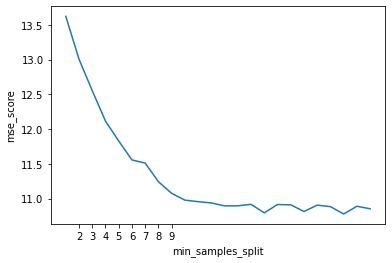

In [ ]:
plt.plot(list(range(1, 25)), val_score)
plt.xticks(list(range(2, 10)))
plt.xlabel("min_samples_split")
plt.ylabel("mse_score")
plt.show()

In [ ]:
from catboost import CatBoostRegressor
# Initialize CatBoostRegressor
model = CatBoostRegressor()
# Fit model
#model.fit(X_train, y_train)
model.fit(X_train, y_train,
          use_best_model=True, plot=True)

print("Count of trees in model = {}".format(model.tree_count_))

# прогнозируем результаты 
y_pred = model.predict(X_test)


print("CatBoost:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

You should provide test set for use best model. use_best_model parameter has been switched to false value.


Learning rate set to 0.042815
0:	learn: 20.3129665	total: 4.16ms	remaining: 4.16s
1:	learn: 19.9254628	total: 7.67ms	remaining: 3.83s
2:	learn: 19.5320776	total: 10.6ms	remaining: 3.51s
3:	learn: 19.1824881	total: 13.7ms	remaining: 3.42s
4:	learn: 18.8534980	total: 16.7ms	remaining: 3.33s
5:	learn: 18.5335840	total: 19.9ms	remaining: 3.3s
6:	learn: 18.2435448	total: 23.3ms	remaining: 3.31s
7:	learn: 17.9437305	total: 26.7ms	remaining: 3.31s
8:	learn: 17.6635870	total: 30.3ms	remaining: 3.33s
9:	learn: 17.3960641	total: 33.6ms	remaining: 3.32s
10:	learn: 17.1382464	total: 36.9ms	remaining: 3.32s
11:	learn: 16.8844374	total: 40.1ms	remaining: 3.3s
12:	learn: 16.6659636	total: 43.4ms	remaining: 3.3s
13:	learn: 16.4762462	total: 46.9ms	remaining: 3.3s
14:	learn: 16.2794815	total: 50.1ms	remaining: 3.29s
15:	learn: 16.0995315	total: 53.3ms	remaining: 3.28s
16:	learn: 15.9423101	total: 56.6ms	remaining: 3.27s
17:	learn: 15.7697006	total: 59.9ms	remaining: 3.27s
18:	learn: 15.5800480	total: 6

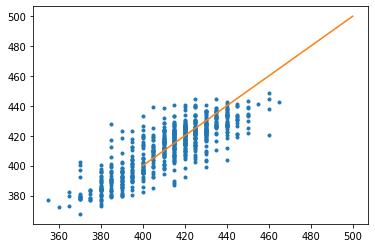

In [ ]:
y_pred = model.predict(X_test)
plt.plot(y_test, y_pred, '.')

x=np.linspace(400,500)
y=x
plt.plot(x,y)
plt.show()

In [ ]:
val_score = []
for i in range(1, 25):
  clf = RandomForestRegressor(max_depth = i)
  clf.fit(X_train, y_train) 
  y_pred = clf.predict(X_test)
  mse_score = mean_squared_error(y_test, y_pred, squared=False)

  val_score.append(mse_score)

ValueError: ignored

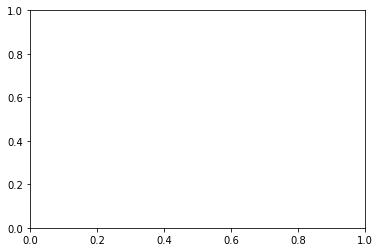

In [ ]:
plt.plot(list(range(2, 10)), val_score)
plt.xticks(list(range(2, 10)))
plt.xlabel("min_samples_split")
plt.ylabel("mse_score")
plt.show()

### 3. у = B_FL_A5_TOT - полное удлинение, на середине, плоский образец, поперечный


In [ ]:
data_x[["B_FL_A5_TOT"]] = data_y[["B_FL_A5_TOT"]]
# все х усредненные значения, исключены строки где у=Nun 
data_x = data_x[df_IQR_new["B_FL_A5_TOT"].notna()]
# разбиваем на х и у
y=data_x["B_FL_A5_TOT"]
del data_x["B_FL_A5_TOT"]
x=data_x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data_x

,H,R_S,R_MIN,R_MAX,R_NUM,F_NUM,S_H,FURNT,FURTIME,FURTOMZ,R_E,F_S,F_MIN,F_E,LP_T
5,10.0,1006.9,10.17,25.60,10.0,7.0,250.0,1169.1,244.0,36.0,1013.7,1001.9,11.96,842.5,789.0
10,10.0,1020.5,10.30,25.77,10.0,7.0,250.0,1173.8,253.0,43.0,1009.0,998.5,11.28,834.3,772.4
13,12.0,999.3,12.98,23.59,10.0,5.0,250.0,1163.7,356.0,47.0,1021.8,894.7,14.73,817.9,791.0
92,14.0,998.2,5.52,22.70,10.0,5.0,250.0,1164.8,357.0,75.0,1009.4,915.9,16.08,845.9,803.5
93,14.0,1005.5,5.57,22.38,10.0,5.0,250.0,1168.8,354.0,70.0,1013.9,914.4,16.04,847.9,821.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10385,16.0,1003.6,5.96,18.81,14.0,9.0,250.0,1176.1,300.0,67.0,944.0,839.9,11.19,764.9,749.5
10404,10.0,1007.6,12.33,15.92,10.0,7.0,200.0,1171.7,266.0,38.0,967.7,963.2,11.22,758.1,728.9
10405,10.0,1009.1,12.53,15.77,10.0,7.0,200.0,1172.7,268.0,43.0,962.0,956.1,10.42,760.1,741.6
10406,10.0,1016.4,12.45,15.77,10.0,7.0,200.0,1183.1,267.0,39.0,969.2,957.6,11.84,767.5,738.0


In [ ]:
import xgboost as xgb

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("Линейная регрессия:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("\n" "Random Forest:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

clf = xgb.XGBClassifier(max_depth=3, min_child_weight=1, gamma=0, colsample_bytree=0.6, subsample=0.6, learning_rate=0.01)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]

print("\n" "XGboost:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

model = LassoCV()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\n" "Lasso:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

#model = RidgeCV()
#model.fit(X_train, y_train)

#y_pred = model.predict(X_test)
#print("\n" "Ridge:" "\n" "Точность = ",r2_score(y_test, y_pred))
#print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

#model = ElasticNetCV()
#model.fit(X_train, y_train)

#y_pred = model.predict(X_test)
#print("\n" "Рандомный лес:" "\n" "Точность = ",r2_score(y_test, y_pred))
#print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

Линейная регрессия:
Точность =  0.21984165506528675
MSE =  1.829105461238396

Random Forest:
Точность =  0.34268051457210325
MSE =  1.6789417183674658

XGboost:
Точность =  0.2112362593191225
MSE =  1.8391656044200935

Lasso:
Точность =  0.22374564744810865
MSE =  1.8245232058555818


In [ ]:
from catboost import CatBoostRegressor
# Initialize CatBoostRegressor
model = CatBoostRegressor()
# Fit model
#model.fit(X_train, y_train)
model.fit(X_train, y_train,
          use_best_model=True, plot=True)

print("Count of trees in model = {}".format(model.tree_count_))

# прогнозируем результаты 
y_pred = model.predict(X_test)


print("CatBoost:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.042815
0:	learn: 1.8975493	total: 11.5ms	remaining: 11.5s


You should provide test set for use best model. use_best_model parameter has been switched to false value.


1:	learn: 1.8739313	total: 25.7ms	remaining: 12.8s
2:	learn: 1.8509468	total: 31.3ms	remaining: 10.4s
3:	learn: 1.8308202	total: 44.9ms	remaining: 11.2s
4:	learn: 1.8112363	total: 49.2ms	remaining: 9.8s
5:	learn: 1.7939121	total: 51.5ms	remaining: 8.54s
6:	learn: 1.7787352	total: 54.9ms	remaining: 7.79s
7:	learn: 1.7632383	total: 58.2ms	remaining: 7.22s
8:	learn: 1.7485584	total: 61.4ms	remaining: 6.76s
9:	learn: 1.7352547	total: 64.8ms	remaining: 6.41s
10:	learn: 1.7186518	total: 68.1ms	remaining: 6.12s
11:	learn: 1.7048597	total: 71.4ms	remaining: 5.88s
12:	learn: 1.6935750	total: 74.6ms	remaining: 5.67s
13:	learn: 1.6791853	total: 78.2ms	remaining: 5.5s
14:	learn: 1.6665670	total: 81.5ms	remaining: 5.35s
15:	learn: 1.6521734	total: 85.1ms	remaining: 5.24s
16:	learn: 1.6425352	total: 88.6ms	remaining: 5.12s
17:	learn: 1.6306599	total: 91.9ms	remaining: 5.01s
18:	learn: 1.6186817	total: 95.3ms	remaining: 4.92s
19:	learn: 1.6104115	total: 98.7ms	remaining: 4.83s
20:	learn: 1.6004957	to

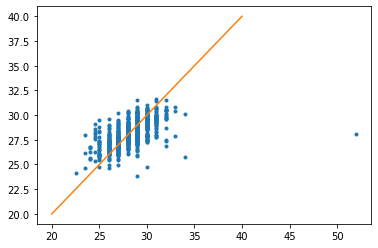

In [ ]:
y_pred = model.predict(X_test)
plt.plot(y_test, y_pred, '.')

x=np.linspace(20,40)
y=x
plt.plot(x,y)
plt.show()

### 4. у = BM20VA - ударная вязкость V -20 (надрез), поперечное, среднее, на середине

In [ ]:
data_x[["BM20VA"]] = data_y[["BM20VA"]]
# все х усредненные значения, исключены строки где у=Nun 
data_x = data_x[df_IQR_new["BM20VA"].notna()]
# разбиваем на х и у
y=data_x["BM20VA"]
del data_x["BM20VA"]
x=data_x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:

data_x

,H,R_S,R_MIN,R_MAX,R_NUM,F_NUM,S_H,FURNT,FURTIME,FURTOMZ,R_E,F_S,F_MIN,F_E,LP_T
489,12.0,1020.4,7.13,15.96,12.0,7.0,200.0,1181.8,485.0,46.0,1004.7,864.5,14.26,788.7,771.6
490,12.0,1013.7,7.13,16.02,12.0,7.0,200.0,1179.1,489.0,55.0,985.0,882.2,14.30,789.3,772.6
491,12.0,990.1,7.01,16.03,12.0,7.0,200.0,1183.9,479.0,67.0,966.0,890.7,13.83,796.2,772.5
492,12.0,965.5,7.10,15.88,12.0,7.0,200.0,1184.0,481.0,74.0,995.5,890.1,13.76,795.8,770.2
493,12.0,1004.0,7.08,15.86,12.0,7.0,200.0,1180.7,484.0,58.0,969.7,894.1,14.01,796.0,765.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8983,12.0,1007.9,9.38,15.30,12.0,9.0,200.0,1175.7,309.0,36.0,985.5,812.4,12.30,757.1,742.0
8984,12.0,1007.0,9.36,15.33,12.0,9.0,200.0,1173.9,309.0,39.0,979.1,837.5,12.35,765.2,747.7
9276,10.0,1000.0,9.52,18.04,12.0,7.0,250.0,1175.1,339.0,48.0,979.8,957.8,15.44,794.4,767.4
9277,10.0,994.4,6.97,19.02,14.0,7.0,250.0,1176.7,347.0,59.0,973.5,930.2,15.18,775.4,751.2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("Линейная регрессия:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE =", mean_squared_error(y_test, y_pred, squared=False))

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("\n" "Random Forest:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

clf = xgb.XGBClassifier(max_depth=3, min_child_weight=1, gamma=0, colsample_bytree=0.6, subsample=0.6, learning_rate=0.01)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]

print("\n" "XGboost:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

model = LassoCV()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\n" "Lasso:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

#model = RidgeCV()
#model.fit(X_train, y_train)

#y_pred = model.predict(X_test)
#print("\n" "Ridge:" "\n" "Точность = ",r2_score(y_test, y_pred))
#print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

#model = ElasticNetCV()
#model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\n" "Рандомный лес:" "\n" "Точность=",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
# результат плохой, тк мало данных 549/10400

Линейная регрессия:
Точность =  0.03327844755581366
MSE = 60.25557137204417

Random Forest:
Точность =  0.27190353608755635
MSE =  52.292688358384545

XGboost:
Точность =  -0.4633042462601771
MSE =  74.13338398245189

Lasso:
Точность =  0.051290498036651644
MSE =  59.69158812361632

Рандомный лес:
Точность= 0.051290498036651644
MSE =  59.69158812361632


In [ ]:
from catboost import CatBoostRegressor
# Initialize CatBoostRegressor
model = CatBoostRegressor()
# Fit model
#model.fit(X_train, y_train)
model.fit(X_train, y_train,
          use_best_model=True, plot=True)

print("Count of trees in model = {}".format(model.tree_count_))

# прогнозируем результаты 
y_pred = model.predict(X_test)


print("CatBoost:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

You should provide test set for use best model. use_best_model parameter has been switched to false value.


Learning rate set to 0.034638
0:	learn: 63.8154644	total: 9.2ms	remaining: 9.2s
1:	learn: 63.4419893	total: 11.6ms	remaining: 5.77s
2:	learn: 63.0653221	total: 13.9ms	remaining: 4.61s
3:	learn: 62.5358923	total: 16.6ms	remaining: 4.14s
4:	learn: 62.0888462	total: 19.4ms	remaining: 3.86s
5:	learn: 61.7348199	total: 22.1ms	remaining: 3.66s
6:	learn: 61.3578979	total: 24.9ms	remaining: 3.53s
7:	learn: 61.0018032	total: 27.5ms	remaining: 3.42s
8:	learn: 60.6745331	total: 30.2ms	remaining: 3.33s
9:	learn: 60.4014486	total: 32.8ms	remaining: 3.25s
10:	learn: 60.0083278	total: 35.5ms	remaining: 3.19s
11:	learn: 59.5762782	total: 38.2ms	remaining: 3.14s
12:	learn: 59.1888546	total: 40.8ms	remaining: 3.1s
13:	learn: 58.9541242	total: 43.5ms	remaining: 3.06s
14:	learn: 58.7308607	total: 46.1ms	remaining: 3.03s
15:	learn: 58.4560254	total: 48.8ms	remaining: 3s
16:	learn: 58.1622776	total: 51.4ms	remaining: 2.97s
17:	learn: 57.9241304	total: 54.2ms	remaining: 2.96s
18:	learn: 57.5881469	total: 57m

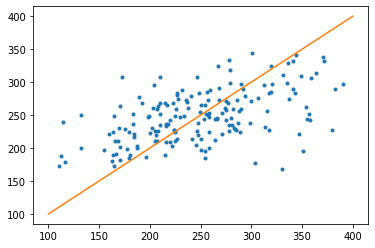

In [ ]:
y_pred = model.predict(X_test)
plt.plot(y_test, y_pred, '.')

x=np.linspace(100,400)
y=x
plt.plot(x,y)
plt.show()

### 5. у = BM40VA - ударная вязкость V -40 (надрез), поперечное, среднее, на середине

In [ ]:
data_x[["BM40VA"]] = data_y[["BM40VA"]]
# все х усредненные значения, исключены строки где у=Nun 
data_x = data_x[df_IQR_new["BM40VA"].notna()]
# разбиваем на х и у
y=data_x["BM40VA"]
del data_x["BM40VA"]
x=data_x

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data_x

,H,R_S,R_MIN,R_MAX,R_NUM,F_NUM,S_H,FURNT,FURTIME,FURTOMZ,R_E,F_S,F_MIN,F_E,LP_T
489,12.0,1020.4,7.13,15.96,12.0,7.0,200.0,1181.8,485.0,46.0,1004.7,864.5,14.26,788.7,771.6
490,12.0,1013.7,7.13,16.02,12.0,7.0,200.0,1179.1,489.0,55.0,985.0,882.2,14.30,789.3,772.6
491,12.0,990.1,7.01,16.03,12.0,7.0,200.0,1183.9,479.0,67.0,966.0,890.7,13.83,796.2,772.5
492,12.0,965.5,7.10,15.88,12.0,7.0,200.0,1184.0,481.0,74.0,995.5,890.1,13.76,795.8,770.2
493,12.0,1004.0,7.08,15.86,12.0,7.0,200.0,1180.7,484.0,58.0,969.7,894.1,14.01,796.0,765.7
494,12.0,1015.0,7.07,15.99,12.0,7.0,200.0,1177.3,486.0,64.0,978.9,894.1,13.80,794.5,777.2
495,12.0,996.6,7.80,25.08,14.0,7.0,310.0,1172.8,376.0,63.0,1013.6,925.2,11.39,780.4,758.3
2157,11.0,999.2,7.99,17.80,14.0,7.0,250.0,1178.3,322.0,49.0,971.5,940.8,12.06,793.5,782.0
2158,11.0,993.8,8.01,17.81,14.0,7.0,250.0,1179.9,297.0,43.0,985.7,928.6,12.42,810.6,780.2
2159,11.0,998.4,7.99,17.74,14.0,7.0,250.0,1177.9,299.0,49.0,968.5,934.9,12.22,807.7,793.0


In [ ]:
x.describe()

,H,R_S,R_MIN,R_MAX,R_NUM,F_NUM,S_H,FURNT,FURTIME,FURTOMZ,R_E,F_S,F_MIN,F_E,LP_T
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,13.586207,999.337931,7.758276,18.497241,13.275862,7.379310,254.137931,1179.048276,414.689655,60.706897,968.377586,859.486207,13.754138,779.682759,756.594828
std,2.286762,9.590837,1.394506,1.958674,1.225362,0.951962,28.533420,4.899991,124.657032,15.211963,24.222181,63.798728,1.945267,27.012311,29.126237
min,11.000000,965.500000,5.920000,15.530000,12.000000,5.000000,200.000000,1167.600000,275.000000,42.000000,923.900000,775.300000,10.160000,743.300000,687.100000
25%,11.000000,994.250000,6.892500,17.802500,12.000000,7.000000,250.000000,1177.075000,296.250000,51.250000,948.125000,790.700000,12.077500,756.725000,741.875000
50%,14.000000,999.200000,7.910000,18.265000,14.000000,7.000000,250.000000,1179.350000,387.500000,57.000000,967.050000,848.750000,12.980000,765.200000,757.300000
75%,16.000000,1004.850000,8.340000,19.845000,14.000000,7.000000,250.000000,1182.700000,507.250000,66.750000,985.525000,928.675000,15.930000,807.675000,781.400000
max,16.000000,1020.400000,10.720000,25.080000,16.000000,9.000000,310.000000,1187.200000,648.000000,119.000000,1017.000000,943.100000,17.370000,838.500000,798.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("Линейная регрессия:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False)) 

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("\n" "Random Forest:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
clf = xgb.XGBClassifier(max_depth=3, min_child_weight=1, gamma=0, colsample_bytree=0.6, subsample=0.6, learning_rate=0.01)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]

print("\n" "XGboost:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

model = LassoCV()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\n" "Lasso:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

#model = RidgeCV()
#model.fit(X_train, y_train)

#y_pred = model.predict(X_test)
#print("\n" "Ridge:" "\n" "Точность = ",r2_score(y_test, y_pred))
#print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

#model = ElasticNetCV()
#model.fit(X_train, y_train)

#y_pred = model.predict(X_test)
#print("\n" "Рандомный лес:" "\n" "Точность = ",r2_score(y_test, y_pred))
#print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
# 1237/10400

Линейная регрессия:
Точность =  -0.3733644958361486
MSE =  34.919613903245846

Random Forest:
Точность =  -0.08400798111225916
MSE =  31.023640925107422

XGboost:
Точность =  -0.0052062362206497514
MSE =  29.87473849257931

Lasso:
Точность =  0.1302244696456326
MSE =  27.789460654215834


In [ ]:
from catboost import CatBoostRegressor
# Initialize CatBoostRegressor
model = CatBoostRegressor()
# Fit model
#model.fit(X_train, y_train)
model.fit(X_train, y_train,
          use_best_model=True, plot=True)

print("Count of trees in model = {}".format(model.tree_count_))

# прогнозируем результаты 
y_pred = model.predict(X_test)


print("CatBoost:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

You should provide test set for use best model. use_best_model parameter has been switched to false value.


Learning rate set to 0.024422
0:	learn: 44.3157918	total: 1.88ms	remaining: 1.88s
1:	learn: 43.9602486	total: 2.96ms	remaining: 1.48s
2:	learn: 43.5827946	total: 3.56ms	remaining: 1.18s
3:	learn: 43.2193296	total: 4.14ms	remaining: 1.03s
4:	learn: 42.9188161	total: 4.73ms	remaining: 941ms
5:	learn: 42.5034185	total: 5.29ms	remaining: 877ms
6:	learn: 42.1630880	total: 5.92ms	remaining: 839ms
7:	learn: 41.7944179	total: 6.53ms	remaining: 810ms
8:	learn: 41.5014947	total: 7.12ms	remaining: 784ms
9:	learn: 41.1551898	total: 7.69ms	remaining: 761ms
10:	learn: 40.8116163	total: 8.32ms	remaining: 748ms
11:	learn: 40.5241417	total: 8.93ms	remaining: 736ms
12:	learn: 40.1876676	total: 9.52ms	remaining: 723ms
13:	learn: 39.9034392	total: 10.1ms	remaining: 710ms
14:	learn: 39.6289171	total: 10.7ms	remaining: 704ms
15:	learn: 39.3481623	total: 11.4ms	remaining: 700ms
16:	learn: 39.0630361	total: 12ms	remaining: 691ms
17:	learn: 38.7991469	total: 12.5ms	remaining: 684ms
18:	learn: 38.4774108	total:

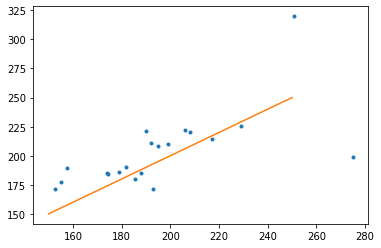

In [ ]:
y_pred = model.predict(X_test)
plt.plot(y_test, y_pred, '.')

x=np.linspace(150,250)
y=x
plt.plot(x,y)
plt.show()

Объяснимая дисперсия - изменчивость вызывается двумя причинами:

*  случайная изменчивость (не интересует нас)
*  целенаправленная изменчивость (создана самим физич. процессом), то есть если модель верная, то она физ. процесс описывает верно, и изменчивость, связанная с изменением параметров физ процесса, должна быть больше, чем дисперсия случайных отклонений. иначе модель плохая


# XGboost - настройка гиперпараметров

In [ ]:
data_x = df_IQR_new.copy(deep=True)
list_y = ['B_FL_RM','B_FL_YSL', 'B_FL_A5_TOT', 'BM20VA', 'BM40VA','BM60UA']
for i in list_y:
  del data_x[i]

data_y = pd.DataFrame()
data_y[['B_FL_RM', 'B_FL_YSL', 'B_FL_A5_TOT', 'BM20VA', 'BM40VA','BM60UA']] = df_IQR_new[['B_FL_RM', 'B_FL_YSL', 'B_FL_A5_TOT', 'BM20VA', 'BM40VA','BM60UA']]

In [ ]:
data_x[["B_FL_RM"]] = data_y[["B_FL_RM"]]
# все х усредненные значения, исключены строки где у=Nun 
data_x = data_x[df_IQR_new["B_FL_RM"].notna()]
# разбиваем на х и у
y=data_x["B_FL_RM"]
del data_x["B_FL_RM"]
x=data_x

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import StratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [ ]:
clf = xgb.XGBClassifier()

In [ ]:
param_test1 = {  
              'max_depth':range(3,10,2),  
              'min_child_weight':range(1,6,2)  
}  

In [ ]:
cv_clf = GridSearchCV(clf, param_test1, cv=StratifiedKFold(n_splits=2, shuffle=True), scoring="precision", n_jobs=-1)

In [ ]:
best_clf = cv_clf.fit(X_train, y_train)
best_clf

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=True),
             estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='precision')

In [ ]:
best_clf.best_params_

{'max_depth': 3, 'min_child_weight': 1}

In [ ]:
clf = xgb.XGBClassifier(max_depth=3, min_child_weight=1)

In [ ]:
print("XGboost:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

ValueError: ignored

In [ ]:
param_test2 = {  
   'gamma': [i / 10.0 for i in range(0, 5)]  
}  

In [ ]:
cv_clf = GridSearchCV(clf, param_test2, cv=StratifiedKFold(n_splits=2, shuffle=True), scoring="precision", n_jobs=-1)

In [ ]:
best_clf = cv_clf.fit(X_train, y_train)
best_clf.best_params_

In [ ]:
clf = xgb.XGBClassifier(max_depth=3, min_child_weight=1, gamma=0)

In [ ]:
print("XGboost:" "\n" "Точность = ",explained_variance_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

In [ ]:
param_test3 = {  
   'subsample': [i / 10.0 for i in range(6, 10)],  
  'colsample_bytree': [i / 10.0 for i in range(6, 10)]  
}  

In [ ]:
cv_clf = GridSearchCV(clf, param_test3, cv=StratifiedKFold(n_splits=2, shuffle=True), scoring="precision", n_jobs=-1)

In [ ]:
best_clf = cv_clf.fit(X_train, y_train)
best_clf.best_params_

In [ ]:
clf = xgb.XGBClassifier(learning_rate=0.01, n_estimators=1000, objective='binary:logistic',
                  silent=True, nthread=1, max_depth = 3)

In [ ]:
best_clf = clf.fit(X_train, y_train)

In [ ]:
y_pred = best_clf.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
print("XGboost:" "\n" "Точность = ",explained_variance_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

In [ ]:
clf = xgb.XGBClassifier(max_depth=3, min_child_weight=1, gamma=0, colsample_bytree=0.6, subsample=0.6, learning_rate=0.01)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
y_pred = best_clf.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
print("XGboost:" "\n" "Точность = ",explained_variance_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))